## EDA Case Study 

### Introduction 

-  The purpose of this Case Study is to develop a basic understanding of risk analytics in Banking & Financial Services. 


-  This involves the Analysis of Data present in the given Datasets and provide the meaning insights from the Data. 


### Business Understanding 

-  The loan providing companies find it hard to give loans to the people due to their insufficient or non-existent credit history. Because of that, some consumers use it as their advantage by becoming a defaulter. 


-  By performing the Exploratory Data Analysis, we need to analyse the different patterns present in the respective Data sets. 


-  When the company receives a loan application, the company has to decide for loan approval based on the applicant’s profile. Two types of risks are associated with the bank’s decision:

      -  If the applicant is likely to repay the loan, then not approving the loan results in a loss of business to the company.

      -  If the applicant is not likely to repay the loan, i.e. He/she is likely to default, then approving the loan may lead to a financial loss for the company.
      
      
-  The data given below contains the information about the loan application at the time of applying for the loan. It contains two types of scenarios:

      -  `The client with payment difficulties:` He/she had late payment more than X days on at least one of the first Y instalments of the loan in our sample,

      -  `All other cases:` All other cases when the payment is paid on time.
  
  
- When a client applies for a loan, there are four types of decisions that could be taken by the client/company):

    - `Approved:` The Company has approved loan Application

    - `Cancelled:` The client cancelled the application sometime during approval. Either the client changed her/his mind about the loan or in some cases due to a higher risk of the client he received worse pricing which he did not want.

    - `Refused:` The company had rejected the loan (because the client does not meet their requirements etc.).

    - `Unused offer:`  Loan has been cancelled by the client but on different stages of the process.

### Data Understanding 

- `application_data.csv: `  Contains all the information of the client at the time of application. The data is about whether a client has payment difficulties.

 
- `previous_application.csv:` Contains information about the client’s previous loan data. It contains the data whether the previous application had been Approved, Cancelled, Refused or Unused offer.

<h2 name='libraries'>   
      <font color = Red >
            <span style='font-family:Georgia'>
            1. Library Handling
            </span>   
        </font>    
</h2>

In [1]:
# importing required libraries 

import numpy as np 
import pandas as pd 
import matplotlib.pyplot as plt 
import seaborn as sns 
import plotly.express as px
import plotly.graph_objects as go
from plotly.subplots import make_subplots
import itertools
import math

In [2]:
# importing warnings library to supress warnings in the output cells

import warnings 
warnings.filterwarnings('ignore')

In [3]:
# formating the options for the output cells 

pd.set_option('display.max_columns', 150)
pd.set_option('display.max_rows', 50)
pd.options.display.float_format= '{:0.4f}'.format

<h2 name='libraries'>   
      <font color = Red >
            <span style='font-family:Georgia'>
            2. Analysing Application Dataframe
            </span>   
        </font>    
</h2>

### 2.1. Data Loading/Inspection
          

In [4]:
# let's load the application_data.csv datframe for the analysis 

df_application= pd.read_csv('application_data.csv')

In [5]:
# let's check the head of the df_application dataframe 

df_application.head()

SK_ID_CURR  TARGET NAME_CONTRACT_TYPE CODE_GENDER FLAG_OWN_CAR  \
0      100002       1         Cash loans           M            N   
1      100003       0         Cash loans           F            N   
2      100004       0    Revolving loans           M            Y   
3      100006       0         Cash loans           F            N   
4      100007       0         Cash loans           M            N   

  FLAG_OWN_REALTY  CNT_CHILDREN  AMT_INCOME_TOTAL   AMT_CREDIT  AMT_ANNUITY  \
0               Y             0       202500.0000  406597.5000   24700.5000   
1               N             0       270000.0000 1293502.5000   35698.5000   
2               Y             0        67500.0000  135000.0000    6750.0000   
3               Y             0       135000.0000  312682.5000   29686.5000   
4               Y             0       121500.0000  513000.0000   21865.5000   

   AMT_GOODS_PRICE NAME_TYPE_SUITE NAME_INCOME_TYPE  \
0      351000.0000   Unaccompanied          Working   
1     1129500.0000          Family    State servant   
2      135000.0000   Unaccompanied          Working   
3      297000.0000   Unaccompanied          Working   
4      513000.0000   Unaccompanied          Working   

             NAME_EDUCATION_TYPE    NAME_FAMILY_STATUS  NAME_HOUSING_TYPE  \
0  Secondary / secondary special  Single / not married  House / apartment   
1               Higher education               Married  House / apartment   
2  Secondary / secondary special  Single / not married  House / apartment   
3  Secondary / secondary special        Civil marriage  House / apartment   
4  Secondary / secondary special  Single / not married  House / apartment   

   REGION_POPULATION_RELATIVE  DAYS_BIRTH  DAYS_EMPLOYED  DAYS_REGISTRATION  \
0                      0.0188       -9461           -637         -3648.0000   
1                      0.0035      -16765          -1188         -1186.0000   
2                      0.0100      -19046           -225         -4260.0000   
3                      0.0080      -19005          -3039         -9833.0000   
4                      0.0287      -19932          -3038         -4311.0000   

   DAYS_ID_PUBLISH  OWN_CAR_AGE  FLAG_MOBIL  FLAG_EMP_PHONE  FLAG_WORK_PHONE  \
0            -2120          nan           1               1                0   
1             -291          nan           1               1                0   
2            -2531      26.0000           1               1                1   
3            -2437          nan           1               1                0   
4            -3458          nan           1               1                0   

   FLAG_CONT_MOBILE  FLAG_PHONE  FLAG_EMAIL OCCUPATION_TYPE  CNT_FAM_MEMBERS  \
0                 1           1           0        Laborers           1.0000   
1                 1           1           0      Core staff           2.0000   
2                 1           1           0        Laborers           1.0000   
3                 1           0           0        Laborers           2.0000   
4                 1           0           0      Core staff           1.0000   

   REGION_RATING_CLIENT  REGION_RATING_CLIENT_W_CITY  \
0                     2                            2   
1                     1                            1   
2                     2                            2   
3                     2                            2   
4                     2                            2   

  WEEKDAY_APPR_PROCESS_START  HOUR_APPR_PROCESS_START  \
0                  WEDNESDAY                       10   
1                     MONDAY                       11   
2                     MONDAY                        9   
3                  WEDNESDAY                       17   
4                   THURSDAY                       11   

   REG_REGION_NOT_LIVE_REGION  REG_REGION_NOT_WORK_REGION  \
0                           0                           0   
1                           0                           0   
2                  

In [6]:
# let's check the shape of df_application dataframe 

print('Application DataFrame shape: ', end= '\n')
print('- No of Rows: {} & No of columns: {}'.format(df_application.shape[0], df_application.shape[1]), end= '\n\n')

Application DataFrame shape: 
- No of Rows: 307511 & No of columns: 122



In [7]:
# let's check the information of df_application dataframe

df_application.info(verbose=True)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 307511 entries, 0 to 307510
Data columns (total 122 columns):
 #   Column                        Dtype  
---  ------                        -----  
 0   SK_ID_CURR                    int64  
 1   TARGET                        int64  
 2   NAME_CONTRACT_TYPE            object 
 3   CODE_GENDER                   object 
 4   FLAG_OWN_CAR                  object 
 5   FLAG_OWN_REALTY               object 
 6   CNT_CHILDREN                  int64  
 7   AMT_INCOME_TOTAL              float64
 8   AMT_CREDIT                    float64
 9   AMT_ANNUITY                   float64
 10  AMT_GOODS_PRICE               float64
 11  NAME_TYPE_SUITE               object 
 12  NAME_INCOME_TYPE              object 
 13  NAME_EDUCATION_TYPE           object 
 14  NAME_FAMILY_STATUS            object 
 15  NAME_HOUSING_TYPE             object 
 16  REGION_POPULATION_RELATIVE    float64
 17  DAYS_BIRTH                    int64  
 18  DAYS_EMPLOYED          

In [8]:
# let's describe the df_application dataframe 

df_application.describe(include= 'all')

SK_ID_CURR      TARGET NAME_CONTRACT_TYPE CODE_GENDER FLAG_OWN_CAR  \
count  307511.0000 307511.0000             307511      307511       307511   
unique         nan         nan                  2           3            2   
top            nan         nan         Cash loans           F            N   
freq           nan         nan             278232      202448       202924   
mean   278180.5186      0.0807                NaN         NaN          NaN   
std    102790.1753      0.2724                NaN         NaN          NaN   
min    100002.0000      0.0000                NaN         NaN          NaN   
25%    189145.5000      0.0000                NaN         NaN          NaN   
50%    278202.0000      0.0000                NaN         NaN          NaN   
75%    367142.5000      0.0000                NaN         NaN          NaN   
max    456255.0000      1.0000                NaN         NaN          NaN   

       FLAG_OWN_REALTY  CNT_CHILDREN  AMT_INCOME_TOTAL   AMT_CREDIT  \
count           307511   307511.0000       307511.0000  307511.0000   
unique               2           nan               nan          nan   
top                  Y           nan               nan          nan   
freq            213312           nan               nan          nan   
mean               NaN        0.4171       168797.9193  599025.9997   
std                NaN        0.7221       237123.1463  402490.7770   
min                NaN        0.0000        25650.0000   45000.0000   
25%                NaN        0.0000       112500.0000  270000.0000   
50%                NaN        0.0000       147150.0000  513531.0000   
75%                NaN        1.0000       202500.0000  808650.0000   
max                NaN       19.0000    117000000.0000 4050000.0000   

        AMT_ANNUITY  AMT_GOODS_PRICE NAME_TYPE_SUITE NAME_INCOME_TYPE  \
count   307499.0000      307233.0000          306219           307511   
unique          nan              nan               7                8   
top             nan              nan   Unaccompanied          Working   
freq            nan              nan          248526           158774   
mean     27108.5739      538396.2074             NaN              NaN   
std      14493.7373      369446.4605             NaN              NaN   
min       1615.5000       40500.0000             NaN              NaN   
25%      16524.0000      238500.0000             NaN              NaN   
50%      24903.0000      450000.0000             NaN              NaN   
75%      34596.0000      679500.0000             NaN              NaN   
max     258025.5000     4050000.0000             NaN              NaN   

                  NAME_EDUCATION_TYPE NAME_FAMILY_STATUS  NAME_HOUSING_TYPE  \
count                          307511             307511             307511   
unique                              5                  6                  6   
top     Secondary / secondary special            Married  House / apartment   
freq                           218391             196432             272868   
mean                              NaN                NaN                NaN   
std                               NaN                NaN                NaN   
min                               NaN                NaN                NaN   
25%                               NaN                NaN                NaN   
50%                               NaN                NaN                NaN   
75%                               NaN                NaN                NaN   
max                               NaN                NaN                NaN   

        REGION_POPULATION_RELATIVE  DAYS_BIRTH  DAYS_EMPLOYED  \
count                  307511.0000 307511.0000    307511.0000   
unique                         nan         nan            nan   
top                            nan         nan            nan   
freq                           nan         nan            nan   
mean                        0.0209 -16036.9951     63815.0459   
st

<h2 name='libraries'>   
      <font color = Red >
            <span style='font-family:Georgia'>
            3. Data Quality Check & Missing Values
            </span>   
        </font>    
</h2>

### 3.1 Finding the missing values for all the columns

In [9]:
# null value % calculation and visualising the null % values for application dataframe

def null_cal(df):
    
    df_null= pd.DataFrame()
    df_null['Columns']= df.columns

    df_null['Null %']= [df[col].isnull().sum()/len(df) *100 for col in df.columns]

    df_null.sort_values(by= 'Null %', inplace= True, ignore_index= True, ascending= True)
    
    fig = px.pie(
    df_null, 
    values='Null %', 
    names= "Columns", 
    title='Null Value percentages for respective columns' 
    )
    
    fig.show()
    
    return df_null

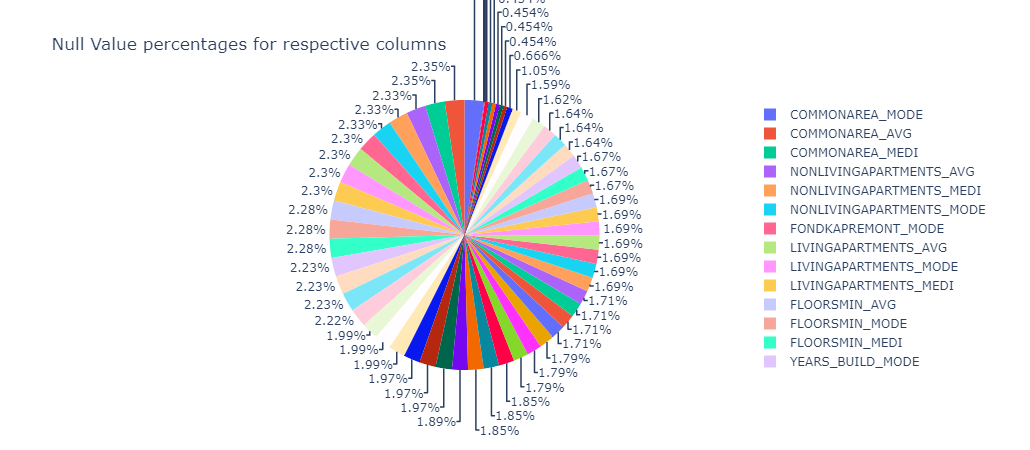

In [10]:
# let's call the function null_cal to get the null %'s of the columns and visualise 

null_col= null_cal(df_application)

In [11]:
# let's check the columns having the missing % 

null_col.sort_values(by= 'Null %', ascending= False, ignore_index= True)

Columns  Null %
0               COMMONAREA_MEDI 69.8723
1                COMMONAREA_AVG 69.8723
2               COMMONAREA_MODE 69.8723
3      NONLIVINGAPARTMENTS_MODE 69.4330
4      NONLIVINGAPARTMENTS_MEDI 69.4330
..                          ...     ...
117         NAME_EDUCATION_TYPE  0.0000
118            NAME_INCOME_TYPE  0.0000
119                CNT_CHILDREN  0.0000
120  REG_REGION_NOT_LIVE_REGION  0.0000
121                  SK_ID_CURR  0.0000

[122 rows x 2 columns]

### 3.2 Dropping columns with high null values %

In [12]:
# let's drop the columns which are having the null % >= 50

col_drp= null_col[null_col['Null %'] >= 50]['Columns'].to_list()

df_application.drop(columns= col_drp, inplace= True)

In [13]:
# let's check the shape of df_application after dropping columns with >= 50% null values

df_application.shape

(307511, 81)

### 3.3 Analysing the columns with less null values %

In [14]:
# let's analyse the column which are having the null % < 13

col_imp= null_col[(null_col['Null %'] <= 13) & (null_col['Null %'] > 0)]['Columns'].to_list()

In [15]:
# let's describe these columns 

df_application[col_imp].describe(include= 'all')

DAYS_LAST_PHONE_CHANGE  CNT_FAM_MEMBERS  AMT_ANNUITY  AMT_GOODS_PRICE  \
count              307510.0000      307509.0000  307499.0000      307233.0000   
unique                     nan              nan          nan              nan   
top                        nan              nan          nan              nan   
freq                       nan              nan          nan              nan   
mean                 -962.8588           2.1527   27108.5739      538396.2074   
std                   826.8085           0.9107   14493.7373      369446.4605   
min                 -4292.0000           1.0000    1615.5000       40500.0000   
25%                 -1570.0000           2.0000   16524.0000      238500.0000   
50%                  -757.0000           2.0000   24903.0000      450000.0000   
75%                  -274.0000           3.0000   34596.0000      679500.0000   
max                     0.0000          20.0000  258025.5000     4050000.0000   

        EXT_SOURCE_2  DEF_30_CNT_SOCIAL_CIRCLE  DEF_60_CNT_SOCIAL_CIRCLE  \
count    306851.0000               306490.0000               306490.0000   
unique           nan                       nan                       nan   
top              nan                       nan                       nan   
freq             nan                       nan                       nan   
mean          0.5144                    0.1434                    0.1000   
std           0.1911                    0.4467                    0.3623   
min           0.0000                    0.0000                    0.0000   
25%           0.3925                    0.0000                    0.0000   
50%           0.5660                    0.0000                    0.0000   
75%           0.6636                    0.0000                    0.0000   
max           0.8550                   34.0000                   24.0000   

        OBS_60_CNT_SOCIAL_CIRCLE  OBS_30_CNT_SOCIAL_CIRCLE NAME_TYPE_SUITE  
count                306490.0000               306490.0000          306219  
unique                       nan                       nan               7  
top                          nan                       nan   Unaccompanied  
freq                         nan                       nan          248526  
mean                      1.4053                    1.4222             NaN  
std                       2.3798                    2.4010             NaN  
min                       0.0000                    0.0000             NaN  
25%                       0.0000                    0.0000             NaN  
50%                       0.0000                    0.0000             NaN  
75%                       2.0000                    2.0000             NaN  
max                     344.0000                  348.0000             NaN

In [16]:
# let's check the dtypes of the columns having less missing %s

df_application[col_imp].dtypes

DAYS_LAST_PHONE_CHANGE      float64
CNT_FAM_MEMBERS             float64
AMT_ANNUITY                 float64
AMT_GOODS_PRICE             float64
EXT_SOURCE_2                float64
DEF_30_CNT_SOCIAL_CIRCLE    float64
DEF_60_CNT_SOCIAL_CIRCLE    float64
OBS_60_CNT_SOCIAL_CIRCLE    float64
OBS_30_CNT_SOCIAL_CIRCLE    float64
NAME_TYPE_SUITE              object
dtype: object

In [17]:
# checking the value_counts of object dtype

df_application['NAME_TYPE_SUITE'].value_counts(normalize= True)*100

Unaccompanied     81.1596
Family            13.1112
Spouse, partner    3.7130
Children           1.0669
Other_B            0.5780
Other_A            0.2828
Group of people    0.0885
Name: NAME_TYPE_SUITE, dtype: float64

In [18]:
# checking the highest frequency occuring category to impute the missing value

df_application['NAME_TYPE_SUITE'].mode()[0]

'Unaccompanied'

<div class="alert alert-block alert-info">
    <span style='font-family:Georgia'>
        <b>Insight: </b><br>Since, NAME_TYPE_SUITE is an object column we can impute the values with the mode having the value Unaccompanied 
    </span>    
</div>

In [19]:
# let's describe some continous columns to impute the missing values

df_application[['DAYS_LAST_PHONE_CHANGE','CNT_FAM_MEMBERS','AMT_GOODS_PRICE','OBS_60_CNT_SOCIAL_CIRCLE']].describe()

DAYS_LAST_PHONE_CHANGE  CNT_FAM_MEMBERS  AMT_GOODS_PRICE  \
count             307510.0000      307509.0000      307233.0000   
mean                -962.8588           2.1527      538396.2074   
std                  826.8085           0.9107      369446.4605   
min                -4292.0000           1.0000       40500.0000   
25%                -1570.0000           2.0000      238500.0000   
50%                 -757.0000           2.0000      450000.0000   
75%                 -274.0000           3.0000      679500.0000   
max                    0.0000          20.0000     4050000.0000   

       OBS_60_CNT_SOCIAL_CIRCLE  
count               306490.0000  
mean                     1.4053  
std                      2.3798  
min                      0.0000  
25%                      0.0000  
50%                      0.0000  
75%                      2.0000  
max                    344.0000

In [20]:
# checking the %s of missing values for the above selected columns

df_application[['DAYS_LAST_PHONE_CHANGE','CNT_FAM_MEMBERS','AMT_GOODS_PRICE','OBS_60_CNT_SOCIAL_CIRCLE']].isnull().sum()/len(df_application)*100

DAYS_LAST_PHONE_CHANGE     0.0003
CNT_FAM_MEMBERS            0.0007
AMT_GOODS_PRICE            0.0904
OBS_60_CNT_SOCIAL_CIRCLE   0.3320
dtype: float64

In [21]:
# printing the values that are being imputed

print('Mean value of AMT_GOODS_PRICE:',df_application['AMT_GOODS_PRICE'].mean(), end= '\n\n\n')

print('Median values for:', df_application[['DAYS_LAST_PHONE_CHANGE','CNT_FAM_MEMBERS','OBS_60_CNT_SOCIAL_CIRCLE']].median(),sep= '\n')

Mean value of AMT_GOODS_PRICE: 538396.2074288895


Median values for:
DAYS_LAST_PHONE_CHANGE     -757.0000
CNT_FAM_MEMBERS               2.0000
OBS_60_CNT_SOCIAL_CIRCLE      0.0000
dtype: float64


<div class="alert alert-block alert-info">
    <span style='font-family:Georgia'>
        <b>Insight 1: </b><br>Since, For column AMT_GOODS_PRICE standard deviation has much higher value as compared to mean andf median, this we will impute this column by Mean =  538396.207
    </span>    
</div>

<div class="alert alert-block alert-info">
    <span style='font-family:Georgia'>
        <b>Insight 2: </b><br>Since, columns DAYS_LAST_PHONE_CHANGE, CNT_FAM_MEMBERS, OBS_60_CNT_SOCIAL_CIRCLE are numerical and has mean nearly same as median, we will impute these columns by Median.
    </span>    
</div>

### 3.4 Checking the dtypes of Columns & Standardizing them

In [22]:
# checking the dtypes of the df_application dataframe

df_application.dtypes

SK_ID_CURR                      int64
TARGET                          int64
NAME_CONTRACT_TYPE             object
CODE_GENDER                    object
FLAG_OWN_CAR                   object
                               ...   
AMT_REQ_CREDIT_BUREAU_DAY     float64
AMT_REQ_CREDIT_BUREAU_WEEK    float64
AMT_REQ_CREDIT_BUREAU_MON     float64
AMT_REQ_CREDIT_BUREAU_QRT     float64
AMT_REQ_CREDIT_BUREAU_YEAR    float64
Length: 81, dtype: object

In [23]:
# Checking the dtype of all days columns 

df_application[['DAYS_BIRTH', 'DAYS_EMPLOYED','DAYS_REGISTRATION','DAYS_ID_PUBLISH','DAYS_LAST_PHONE_CHANGE']].head()

DAYS_BIRTH  DAYS_EMPLOYED  DAYS_REGISTRATION  DAYS_ID_PUBLISH  \
0       -9461           -637         -3648.0000            -2120   
1      -16765          -1188         -1186.0000             -291   
2      -19046           -225         -4260.0000            -2531   
3      -19005          -3039         -9833.0000            -2437   
4      -19932          -3038         -4311.0000            -3458   

   DAYS_LAST_PHONE_CHANGE  
0              -1134.0000  
1               -828.0000  
2               -815.0000  
3               -617.0000  
4              -1106.0000

In [24]:
# Convert DAYS_BIRTH,DAYS_EMPLOYED,DAYS_ID_PUBLISH,DAYS_REGISTRATION,DAYS_LAST_PHONE_CHANGE from negative to positive as days cannot be negative.

df_application[['DAYS_BIRTH','DAYS_EMPLOYED','DAYS_ID_PUBLISH','DAYS_REGISTRATION','DAYS_LAST_PHONE_CHANGE']]= df_application[['DAYS_BIRTH','DAYS_EMPLOYED','DAYS_ID_PUBLISH','DAYS_REGISTRATION','DAYS_LAST_PHONE_CHANGE']].apply(lambda x: abs(x))

### 3.5 Outlier Analysis

In [25]:
# let us define a function to plot the boxplots for the given columns to analyse Outliers

def out_plot(df, cols): 
    df= df[cols]
    
    sns.set_style(style= 'darkgrid')
    plt.figure(figsize=[20,20])
    for i,j in itertools.zip_longest(cols,range(len(cols))):
        plt.subplot(3,3,j+1)
        ax = sns.boxplot(y= df[i])
        plt.xlabel("")
        plt.ylabel("")
        plt.title(i, fontdict={'size':12},loc='center')

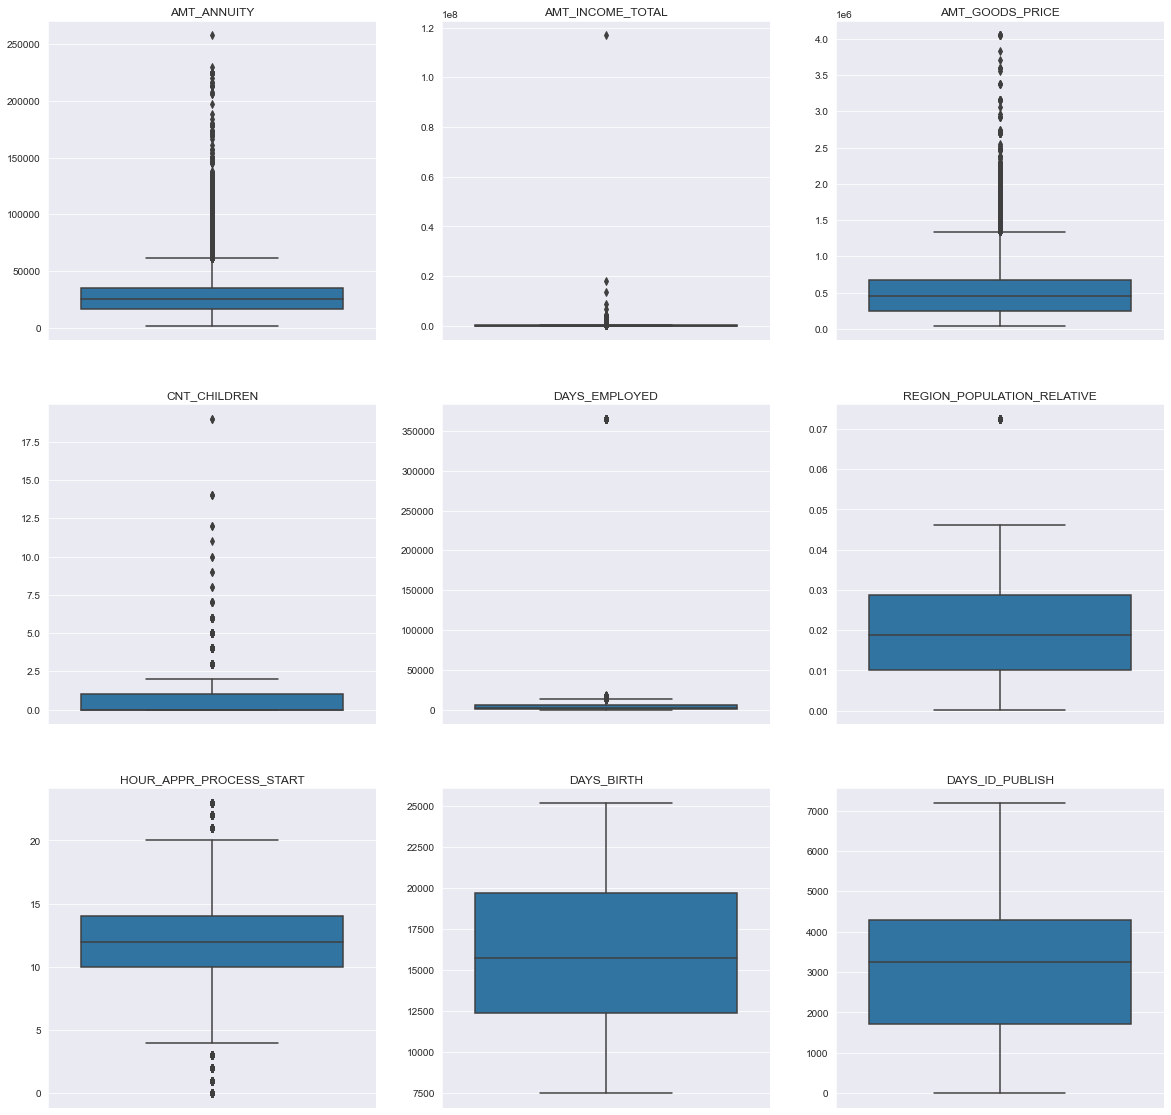

In [26]:
num_col= ['AMT_ANNUITY', 'AMT_INCOME_TOTAL', 'AMT_GOODS_PRICE', 'CNT_CHILDREN','DAYS_EMPLOYED','REGION_POPULATION_RELATIVE', 
          'HOUR_APPR_PROCESS_START','DAYS_BIRTH','DAYS_ID_PUBLISH']

out_plot(df_application, num_col)

<div class="alert alert-block alert-info">
    <span style='font-family:Georgia'>
        <b>Insight: </b><br>It can be seen that in application dataframe
        <ol>
            <li>AMT_ANNUITY, AMT_GOODS_PRICE, CNT_CHILDREN, REGION_POPULATION_RELATIVE have some number of outliers.</li>
            <li>AMT_INCOME_TOTAL has huge number of outliers which indicates that very less number of loan applicants have higher income when compared to the others.</li>
            <li>DAYS_BIRTH and DAYS_ID_PUBLISH has no outliers which means the data available can be used without any outlier treatment.</li>
            <li>DAYS_EMPLOYED has outlier values around 350000(days) which is around 958 years which is impossible and hence this is not a correct value.</li>
            <li>HOUR_APPR_PROCESS_START has outliers on both sides and thus values of 0.95 quantile and .05 quantile will be calculated and outlier treatment has to be done.</li>
        </ol>        
    </span>    
</div>
<p>
    <span style='font-family:Georgia'>
           Stats for these columns can also be seen below.
    </span>
</p>

In [27]:
df_application[['AMT_ANNUITY', 'AMT_INCOME_TOTAL', 'AMT_GOODS_PRICE', 'CNT_CHILDREN','DAYS_EMPLOYED','REGION_POPULATION_RELATIVE', 
          'HOUR_APPR_PROCESS_START','DAYS_BIRTH','DAYS_ID_PUBLISH']].describe()

AMT_ANNUITY  AMT_INCOME_TOTAL  AMT_GOODS_PRICE  CNT_CHILDREN  \
count  307499.0000       307511.0000      307233.0000   307511.0000   
mean    27108.5739       168797.9193      538396.2074        0.4171   
std     14493.7373       237123.1463      369446.4605        0.7221   
min      1615.5000        25650.0000       40500.0000        0.0000   
25%     16524.0000       112500.0000      238500.0000        0.0000   
50%     24903.0000       147150.0000      450000.0000        0.0000   
75%     34596.0000       202500.0000      679500.0000        1.0000   
max    258025.5000    117000000.0000     4050000.0000       19.0000   

       DAYS_EMPLOYED  REGION_POPULATION_RELATIVE  HOUR_APPR_PROCESS_START  \
count    307511.0000                 307511.0000              307511.0000   
mean      67724.7421                      0.0209                  12.0634   
std      139443.7518                      0.0138                   3.2658   
min           0.0000                      0.0003                   0.0000   
25%         933.0000                      0.0100                  10.0000   
50%        2219.0000                      0.0188                  12.0000   
75%        5707.0000                      0.0287                  14.0000   
max      365243.0000                      0.0725                  23.0000   

       DAYS_BIRTH  DAYS_ID_PUBLISH  
count 307511.0000      307511.0000  
mean   16036.9951        2994.2024  
std     4363.9886        1509.4504  
min     7489.0000           0.0000  
25%    12413.0000        1720.0000  
50%    15750.0000        3254.0000  
75%    19682.0000        4299.0000  
max    25229.0000        7197.0000

### 3.6 Binning Numerical Columns to create a categorical column

In [28]:
# Creating bins for INCOME_RANGE

df_application['INCOME_RANGE']= df_application['AMT_INCOME_TOTAL']
bins= [25000,50000,1*(10**5),5*(10**5),1*(10**6),5*(10**6),10*(10**6),999999999]
slots= ['25k - 50k','50k - 1L','1L - 5L','5L - 1M','1M - 5M','5M - 10M','10M +']

df_application['INCOME_RANGE'] = pd.cut(df_application['INCOME_RANGE'], bins= bins, labels= slots)

In [29]:
df_application['INCOME_RANGE'].value_counts(normalize=True)*100

1L - 5L     78.4073
50k - 1L    19.2452
25k - 50k    1.4689
5L - 1M      0.7974
1M - 5M      0.0797
10M +        0.0010
5M - 10M     0.0007
Name: INCOME_RANGE, dtype: float64

<div class="alert alert-block alert-info">
    <span style='font-family:Georgia'>
        <b>Insight: </b><br>More than 75% loan applicants have income amount in the range of 1L - 5L. Almost 20% loan applicants have income less than 1L.       
    </span>    
</div>

In [30]:
# Creating bins for CREDIT_RANGE

df_application['CREDIT_RANGE']= df_application['AMT_CREDIT']
bins= [25000,50000,1*(10**5),5*(10**5),1*(10**6),5*(10**6)]
slots= ['25k - 50k','50k - 1L','1L - 5L','5L - 1M','1M - 5M']

df_application['CREDIT_RANGE'] = pd.cut(df_application['CREDIT_RANGE'], bins= bins, labels= slots)

In [31]:
df_application['CREDIT_RANGE'].value_counts(normalize=True)*100

1L - 5L     46.6094
5L - 1M     35.1835
1M - 5M     16.2547
50k - 1L     1.7700
25k - 50k    0.1824
Name: CREDIT_RANGE, dtype: float64

<div class="alert alert-block alert-info">
    <span style='font-family:Georgia'>
        <b>Insight: </b> <br>Around 45% loan applicants have taken loan between 1L-5L.
    </span>    
</div>

In [32]:
# Creating bins for DAYS_BIRTH

df_application['AGE'] = df_application['DAYS_BIRTH'] // 365
bins = [0,20,30,40,50,100]
slots = ['0-20','20-30','30-40','40-50','50 above']

df_application['AGE']=pd.cut(df_application['AGE'],bins=bins,labels=slots)

In [33]:
df_application['AGE'].value_counts(normalize=True)*100

50 above   31.6044
30-40      27.0290
40-50      24.1946
20-30      17.1717
0-20        0.0003
Name: AGE, dtype: float64

<div class="alert alert-block alert-info">
    <span style='font-family:Georgia'>
        <b>Insight: </b> <br>31% loan applicants have age above 50 years. More than 80% of loan applicants have age over 30 years.
    </span>    
</div>

In [34]:
# Creating bins for DAYS_EMPLOYED

df_application['YEARS_EMPLOYED'] = df_application['DAYS_EMPLOYED'] // 365
bins = [-1,5,10,20,30,40,50,100, 99999]
slots = ['0-5','5-10','10-20','20-30','30-40','40-50','50 above','Unknown']

df_application['YEARS_EMPLOYED']=pd.cut(df_application['YEARS_EMPLOYED'],bins=bins,labels=slots)

In [35]:
df_application['YEARS_EMPLOYED'].value_counts(normalize=True)*100

0-5        49.6041
5-10       18.2052
Unknown    18.0072
10-20      10.6201
20-30       2.7345
30-40       0.7720
40-50       0.0569
50 above    0.0000
Name: YEARS_EMPLOYED, dtype: float64

<div class="alert alert-block alert-info">
    <span style='font-family:Georgia'>
        <b>Insight: </b> <br>Almost 50% of the loan applicants have work experience within 0-5 years and 18% of them have work experience between 5-10 years.
    </span>    
</div>

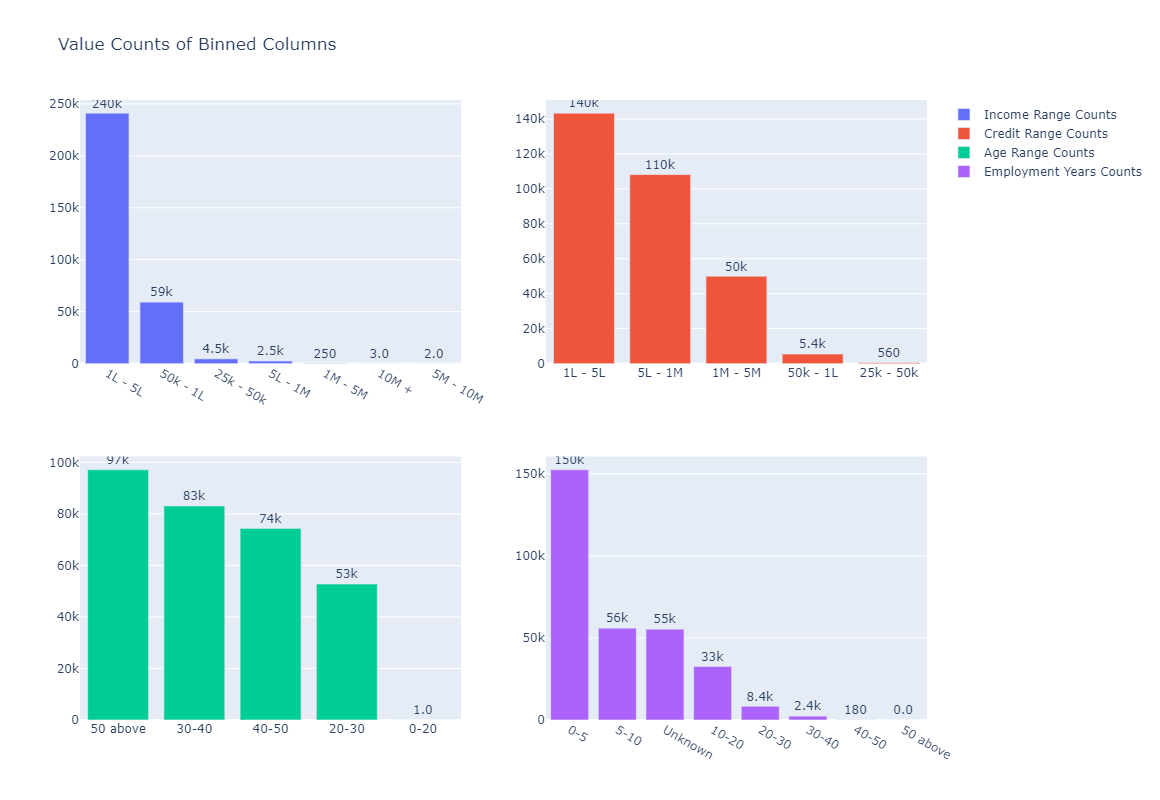

In [36]:
# let's plot the value count's of all the binned variables 

fig= make_subplots(rows= 2, cols= 2, specs=[[{"type": "xy"}, {"type": "xy"}],[{"type": "xy"}, {"type": "xy"}]], shared_yaxes= False)

fig.add_trace(go.Bar(x= df_application['INCOME_RANGE'].value_counts().index, 
                     y= df_application['INCOME_RANGE'].value_counts(),
                     text= df_application['INCOME_RANGE'].value_counts(),
                     name= 'Income Range Counts'),
              1, 1)

fig.add_trace(go.Bar(x= df_application['CREDIT_RANGE'].value_counts().index, 
                     y= df_application['CREDIT_RANGE'].value_counts(),
                     text= df_application['CREDIT_RANGE'].value_counts(),
                     name= 'Credit Range Counts'),
              1, 2)

fig.add_trace(go.Bar(x= df_application['AGE'].value_counts().index, 
                     y= df_application['AGE'].value_counts(),
                     text= df_application['AGE'].value_counts(),
                     name= 'Age Range Counts'),
              2, 1)

fig.add_trace(go.Bar(x= df_application['YEARS_EMPLOYED'].value_counts().index, 
                     y= df_application['YEARS_EMPLOYED'].value_counts(),
                     text= df_application['YEARS_EMPLOYED'].value_counts(),
                     name= 'Employment Years Counts'),
              2, 2)

fig.update_traces(texttemplate='%{text:.2s}', textposition='outside')
fig.update_layout(title_text = 'Value Counts of Binned Columns', height= 800)
fig.show()

<h2 name='libraries'>   
      <font color = Red >
            <span style='font-family:Georgia'>
             4. Univariate and Bivariate Analysis 
          </span>
       </font>    
</h2>

### 4.1 Imbalance Analysis of Target Variable

In [37]:
# let's create a new column for the TARGET_CAT 

df_application['TARGET_CAT']= np.where(df_application['TARGET']== 1, 'PAYMENT_DIFFICULTIES', 'PAYMENT_PAID')

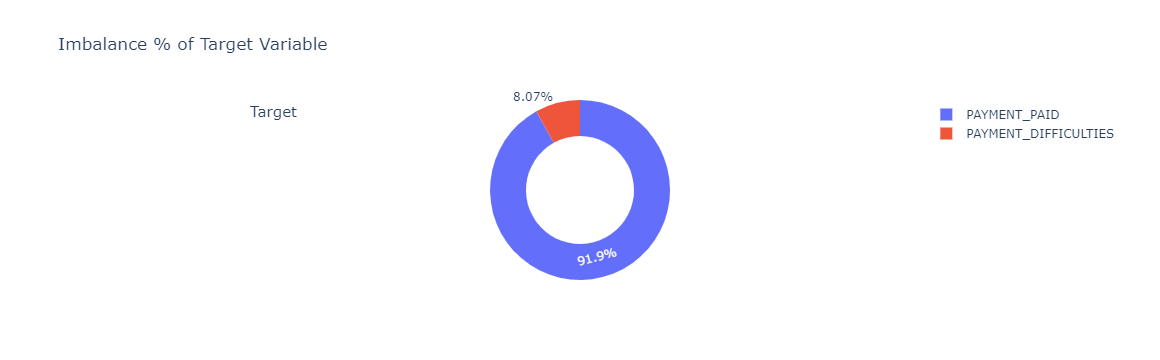

In [38]:
fig = make_subplots(rows=1, cols=1, specs=[[{'type':'domain'}]])

fig.add_trace(go.Pie(labels=df_application['TARGET_CAT'].value_counts().index, 
                     values=df_application['TARGET_CAT'].value_counts().values, 
                     name="Target", hole= .6),
              1, 1)
                    
fig.update_layout(title_text= 'Imbalance % of Target Variable',
                  annotations=[dict(text='Target', x=0, y=1, font_size=15, showarrow=False)], 
                  height= 300)                

<div class="alert alert-block alert-info">
    <span style='font-family:Georgia'>
        <b>Insight: </b> <br>Ratios of imbalance in percentage with respect to payment paid and Defaulter datas are: 91.93 and 8.07.
    </span>    
</div>

### 4.2 Dividing the data with respect to target variable

In [39]:
# Divide the data into two sets i.e Target=0 and Target=1

df_target0= df_application[df_application['TARGET']== 0]
df_target1= df_application[df_application['TARGET']== 1]

In [40]:
df_target0.head()

SK_ID_CURR  TARGET NAME_CONTRACT_TYPE CODE_GENDER FLAG_OWN_CAR  \
1      100003       0         Cash loans           F            N   
2      100004       0    Revolving loans           M            Y   
3      100006       0         Cash loans           F            N   
4      100007       0         Cash loans           M            N   
5      100008       0         Cash loans           M            N   

  FLAG_OWN_REALTY  CNT_CHILDREN  AMT_INCOME_TOTAL   AMT_CREDIT  AMT_ANNUITY  \
1               N             0       270000.0000 1293502.5000   35698.5000   
2               Y             0        67500.0000  135000.0000    6750.0000   
3               Y             0       135000.0000  312682.5000   29686.5000   
4               Y             0       121500.0000  513000.0000   21865.5000   
5               Y             0        99000.0000  490495.5000   27517.5000   

   AMT_GOODS_PRICE  NAME_TYPE_SUITE NAME_INCOME_TYPE  \
1     1129500.0000           Family    State servant   
2      135000.0000    Unaccompanied          Working   
3      297000.0000    Unaccompanied          Working   
4      513000.0000    Unaccompanied          Working   
5      454500.0000  Spouse, partner    State servant   

             NAME_EDUCATION_TYPE    NAME_FAMILY_STATUS  NAME_HOUSING_TYPE  \
1               Higher education               Married  House / apartment   
2  Secondary / secondary special  Single / not married  House / apartment   
3  Secondary / secondary special        Civil marriage  House / apartment   
4  Secondary / secondary special  Single / not married  House / apartment   
5  Secondary / secondary special               Married  House / apartment   

   REGION_POPULATION_RELATIVE  DAYS_BIRTH  DAYS_EMPLOYED  DAYS_REGISTRATION  \
1                      0.0035       16765           1188          1186.0000   
2                      0.0100       19046            225          4260.0000   
3                      0.0080       19005           3039          9833.0000   
4                      0.0287       19932           3038          4311.0000   
5                      0.0358       16941           1588          4970.0000   

   DAYS_ID_PUBLISH  FLAG_MOBIL  FLAG_EMP_PHONE  FLAG_WORK_PHONE  \
1              291           1               1                0   
2             2531           1               1                1   
3             2437           1               1                0   
4             3458           1               1                0   
5              477           1               1                1   

   FLAG_CONT_MOBILE  FLAG_PHONE  FLAG_EMAIL OCCUPATION_TYPE  CNT_FAM_MEMBERS  \
1                 1           1           0      Core staff           2.0000   
2                 1           1           0        Laborers           1.0000   
3                 1           0           0        Laborers           2.0000   
4                 1           0           0      Core staff           1.0000   
5                 1           1           0        Laborers           2.0000   

   REGION_RATING_CLIENT  REGION_RATING_CLIENT_W_CITY  \
1                     1                            1   
2                     2                            2   
3                     2                            2   
4                     2                            2   
5                     2                            2   

  WEEKDAY_APPR_PROCESS_START  HOUR_APPR_PROCESS_START  \
1                     MONDAY                       11   
2                     MONDAY                        9   
3                  WEDNESDAY                       17   
4                   THURSDAY                       11   
5                  WEDNESDAY                       16   

   REG_REGION_NOT_LIVE_REGION  REG_REGION_NOT_WORK_REGION  \
1                           0                           0   
2                           0                           0   
3                           0                           0   
4                           0 

In [41]:
df_target1.head()

SK_ID_CURR  TARGET NAME_CONTRACT_TYPE CODE_GENDER FLAG_OWN_CAR  \
0       100002       1         Cash loans           M            N   
26      100031       1         Cash loans           F            N   
40      100047       1         Cash loans           M            N   
42      100049       1         Cash loans           F            N   
81      100096       1         Cash loans           F            N   

   FLAG_OWN_REALTY  CNT_CHILDREN  AMT_INCOME_TOTAL   AMT_CREDIT  AMT_ANNUITY  \
0                Y             0       202500.0000  406597.5000   24700.5000   
26               Y             0       112500.0000  979992.0000   27076.5000   
40               Y             0       202500.0000 1193580.0000   35028.0000   
42               N             0       135000.0000  288873.0000   16258.5000   
81               Y             0        81000.0000  252000.0000   14593.5000   

    AMT_GOODS_PRICE NAME_TYPE_SUITE      NAME_INCOME_TYPE  \
0       351000.0000   Unaccompanied               Working   
26      702000.0000   Unaccompanied               Working   
40      855000.0000   Unaccompanied  Commercial associate   
42      238500.0000   Unaccompanied               Working   
81      252000.0000   Unaccompanied             Pensioner   

              NAME_EDUCATION_TYPE    NAME_FAMILY_STATUS  NAME_HOUSING_TYPE  \
0   Secondary / secondary special  Single / not married  House / apartment   
26  Secondary / secondary special                 Widow  House / apartment   
40  Secondary / secondary special               Married  House / apartment   
42  Secondary / secondary special        Civil marriage  House / apartment   
81  Secondary / secondary special               Married  House / apartment   

    REGION_POPULATION_RELATIVE  DAYS_BIRTH  DAYS_EMPLOYED  DAYS_REGISTRATION  \
0                       0.0188        9461            637          3648.0000   
26                      0.0180       18724           2628          6573.0000   
40                      0.0252       17482           1262          1182.0000   
42                      0.0073       13384           3597            45.0000   
81                      0.0287       24794         365243          5391.0000   

    DAYS_ID_PUBLISH  FLAG_MOBIL  FLAG_EMP_PHONE  FLAG_WORK_PHONE  \
0              2120           1               1                0   
26             1827           1               1                0   
40             1029           1               1                0   
42             4409           1               1                1   
81             4199           1               0                0   

    FLAG_CONT_MOBILE  FLAG_PHONE  FLAG_EMAIL OCCUPATION_TYPE  CNT_FAM_MEMBERS  \
0                  1           1           0        Laborers           1.0000   
26                 1           0           0   Cooking staff           1.0000   
40                 1           0           0        Laborers           2.0000   
42                 1           1           0     Sales staff           2.0000   
81                 1           0           0             NaN           2.0000   

    REGION_RATING_CLIENT  REGION_RATING_CLIENT_W_CITY  \
0                      2                            2   
26                     3                            2   
40                     2                            2   
42                     3                            3   
81                     2                            2   

   WEEKDAY_APPR_PROCESS_START  HOUR_APPR_PROCESS_START  \
0                   WEDNESDAY                       10   
26                     MONDAY                        9   
40                    TUESDAY                        9   
42                   THURSDAY                       11   
81                   THURSDAY                       10   

    REG_REGION_NOT_LIVE_REGION  REG_REGION_NOT_WORK_REGION  \
0                            0                           0   
26                           0                           0   
40         

In [42]:
# Drop columns SK_ID_CURR,TARGET as these have no importance in analysis

df_target0.drop(columns= ['SK_ID_CURR','TARGET'], inplace= True)
df_target1.drop(columns= ['SK_ID_CURR','TARGET'], inplace= True)

In [43]:
print('Shape of Target 0: ', df_target0.shape, end='\n')
print('Shape of Target 1: ', df_target1.shape)

Shape of Target 0:  (282686, 84)
Shape of Target 1:  (24825, 84)


In [44]:
# Replacing all the XAP's and XNA's with NaN

df_target0.replace(['XAP','XNA'], np.NaN, inplace= True)
df_target1.replace(['XAP','XNA'], np.NaN, inplace= True)

### 4.3 Univariate Analysis for Application Data

<h3>   
      <font color = purple >
            <span style='font-family:Georgia'>
             4.3.1 Categorical Univariate Analysis
            </span>   
        </font>    
</h3>

In [45]:
# defining a function for the univariate categorical analysis

def univ_plot_cat(col): 
    
    fig= make_subplots(rows= 1, cols= 2, specs=[[{"type": "xy"}, {"type": "xy"}]], shared_yaxes= False)

    fig.add_trace(go.Bar(x= df_target0[col].value_counts().index, 
                         y= df_target0[col].value_counts(),
                         text= df_target0[col].value_counts(),
                         name= 'Payment Paid'),
              1, 1)

    fig.add_trace(go.Bar(x= df_target1[col].value_counts().index,
                         y= df_target1[col].value_counts(), 
                     text= df_target1[col].value_counts(),
                    name= 'Payment Difficulties'),
              1, 2)
    fig.update_traces(texttemplate='%{text:.2s}', textposition='outside')
    fig.update_layout(title_text = 'Value Counts of Category Column'+' '+ col, height= 300)
    fig.show()

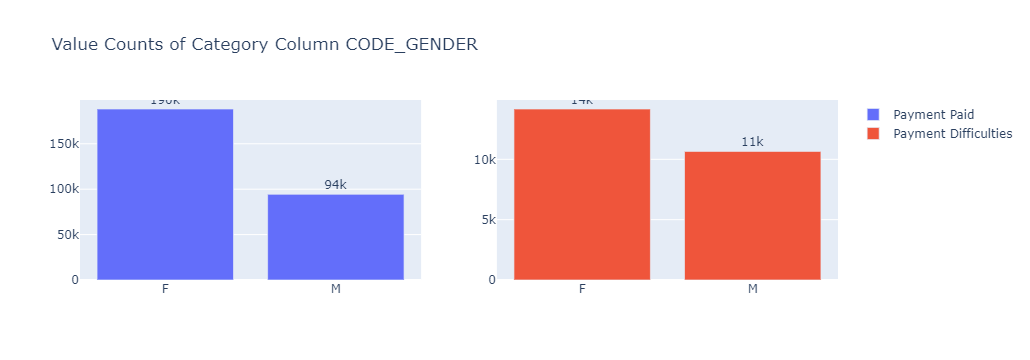

In [46]:
# let's plot the univariate categorical analysis for CODE_GENDER

univ_plot_cat('CODE_GENDER')


<div class="alert alert-block alert-info">
    <span style='font-family:Georgia'>
        <b>Inferences: </b> 
        <li>The number of female clients is more than the number of male clients.  </li>
         <li>Female clients have a higher chance of not returning their loans compared to man.  </li>
    </span>    
</div>

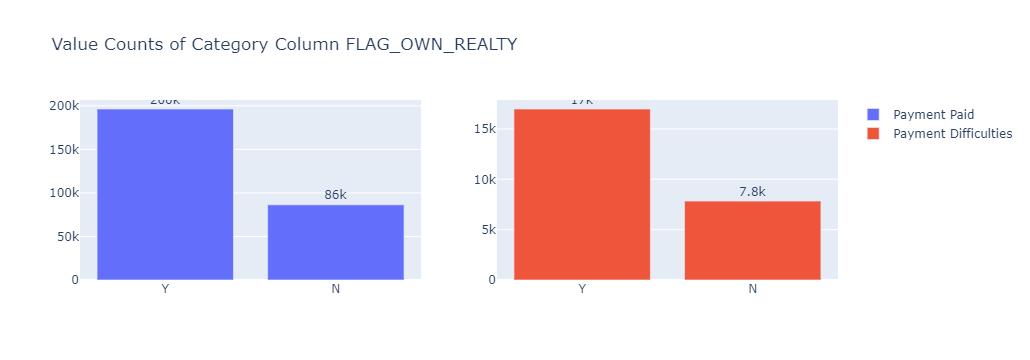

In [47]:
# let's plot the univariate categorical analysis for FLAG_OWN_REALTY

univ_plot_cat('FLAG_OWN_REALTY')

<div class="alert alert-block alert-info">
    <span style='font-family:Georgia'>
        <b>Inferences: </b> 
        <li>The clients who own real estate are more than double of the ones that don't own.     </li>
         <li>Number of clients with Flag reality have more difficulty in paying the loan.</li>
    </span>    
</div>

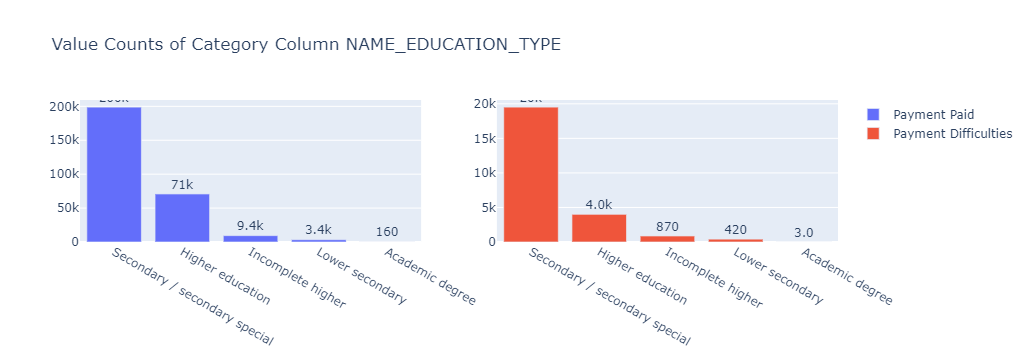

In [48]:
# let's plot the univariate categorical analysis for NAME_EDUCATION_TYPE

univ_plot_cat('NAME_EDUCATION_TYPE')

<div class="alert alert-block alert-info">
    <span style='font-family:Georgia'>
        <b>Inferences: </b>
            Majority of the clients have Secondary / secondary special education, followed by clients with Higher education. Only a very small number having an academic degree.
    </span>    
</div>

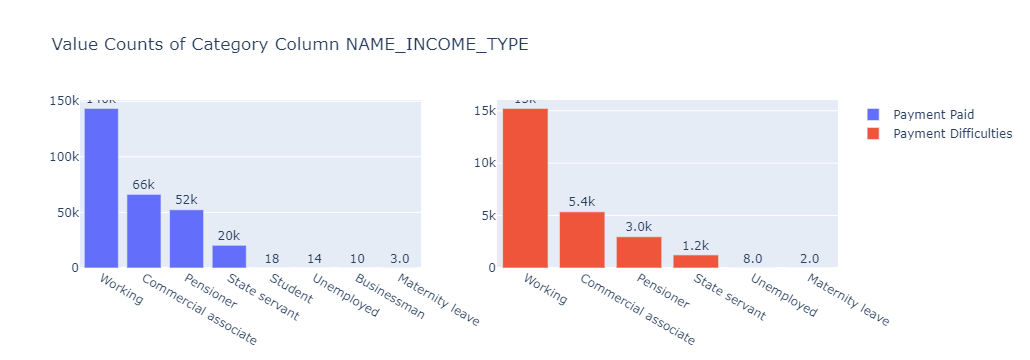

In [49]:
# let's plot the univariate categorical analysis for NAME_INCOME_TYPE

univ_plot_cat('NAME_INCOME_TYPE')

<div class="alert alert-block alert-info">
    <span style='font-family:Georgia'>
        <b>Inferences: </b> 
        <ul>
            <li>Most of applicants for loans have income type as Working, followed by Commercial associate, Pensioner and State servant.</li>
            <li>Student and Businessmen, though less in numbers do not have any default record. Thus these two category are <b>safe categories</b> for providing loan.</li>  
        </ul>
    </span>    
</div>

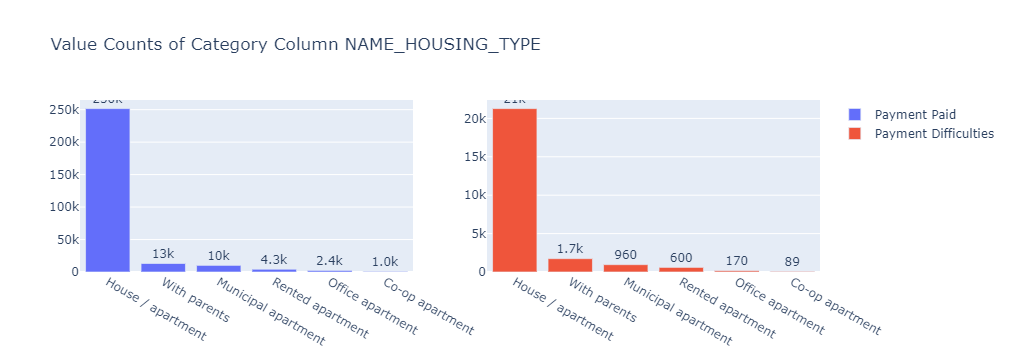

In [50]:
# let's plot the univariate categorical analysis for NAME_HOUSING_TYPE

univ_plot_cat('NAME_HOUSING_TYPE')

<div class="alert alert-block alert-info">
    <span style='font-family:Georgia'>
        <b>Inferences: </b> 
       Majority of people live in House/apartment
    </span>    
</div>

<h3>   
      <font color = purple >
            <span style='font-family:Georgia'>
            4.3.2 Continous Univariate Analysis
            </span>   
        </font>    
</h3> 

In [51]:
# defining a function for the univariate continous analysis

def univ_plot_con(col):
    
    plt.figure(figsize= [20,10])
    grid = plt.GridSpec(2, 2, wspace=0.1, hspace=0.3)
    
    plt.title('Distribution plot of Continous Column '+ col, fontdict= {'size': 20})
    sns.distplot(df_target0[col].dropna(), hist= False, label= 'Payment Paid')
    sns.distplot(df_target1[col].dropna(), hist= False, label= 'Payment Difficulties')

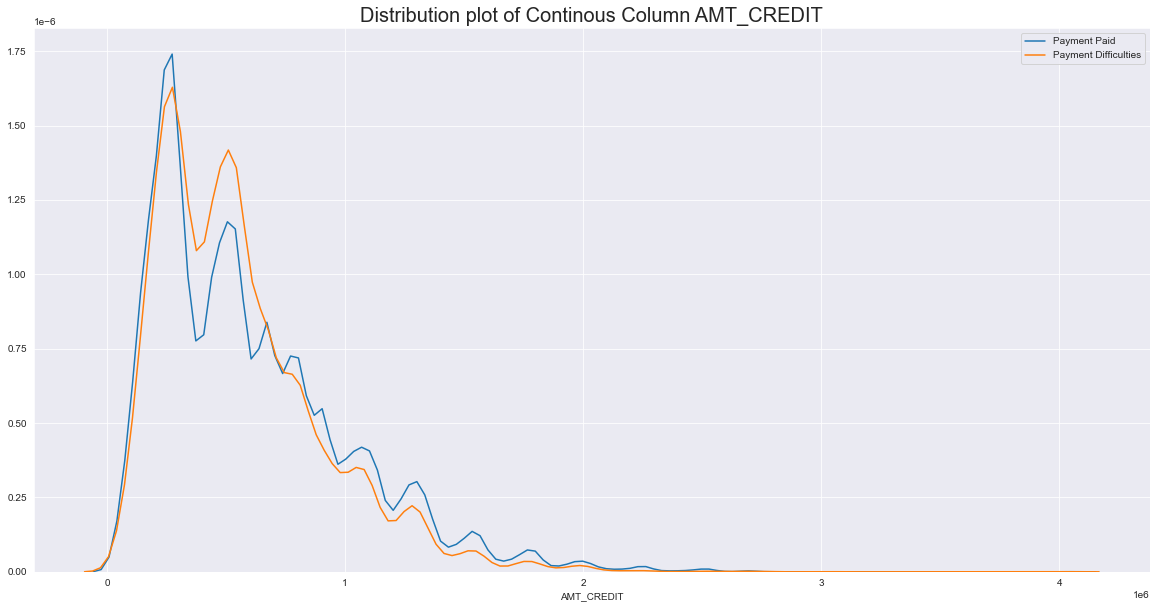

In [52]:
# let's plot the univariate continous analysis for AMT_CREDIT

univ_plot_con('AMT_CREDIT')

<div class="alert alert-block alert-info">
    <span style='font-family:Georgia'>
        <b>Inferences: </b> 
        <li>credit amount of loan is mainly less than 20 lac.</li>
        <li>We can see that the graph is right skewed</li>
        <li>Credit amount for both the targets have almost same pattern of distribution</li>
    </span>    
</div>

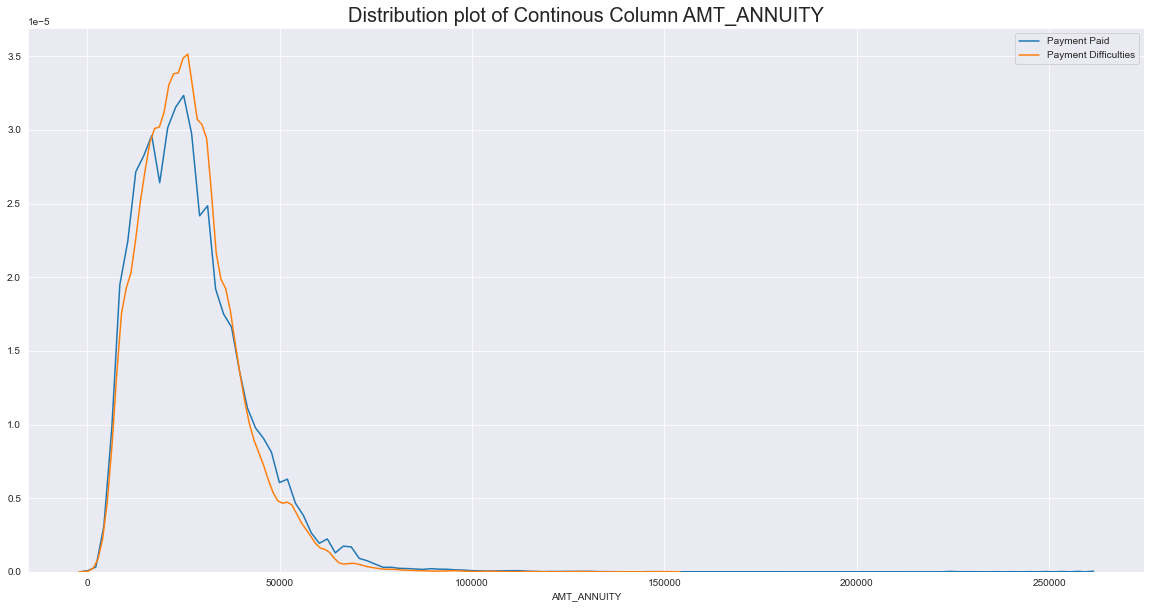

In [53]:
# let's plot the univariate continous analysis for AMT_ANNUITY

univ_plot_con('AMT_ANNUITY')

<div class="alert alert-block alert-info">
    <span style='font-family:Georgia'>
        <b>Inferences: </b> 
        <li> Most people pay annuity below 50000 for the credit loan </li>
        <li> We can see that the graph is right skewed</li>
        <li> Annuity amount for both the targets have almost same pattern of distribution</li>
    </span>    
</div>

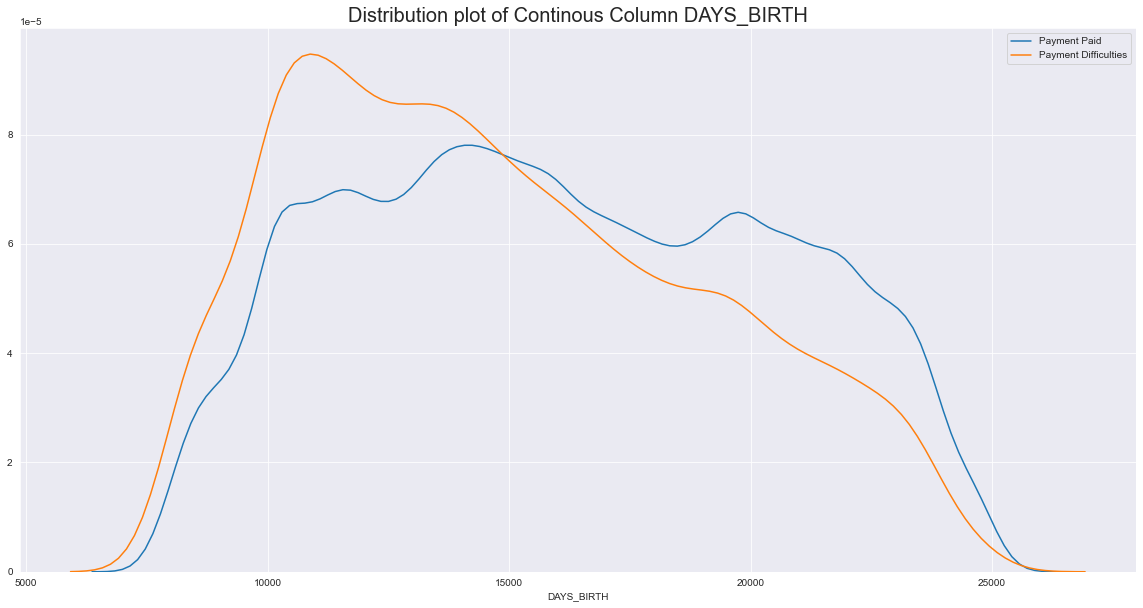

In [54]:
# let's plot the univariate continous analysis for DAYS_BIRTH

univ_plot_con('DAYS_BIRTH')

<div class="alert alert-block alert-info">
    <span style='font-family:Georgia'>
        <b>Inferences: </b> <br> With this graph we cannot see any relevant pattern wrt age related to both the targets.
    </span>    
</div>

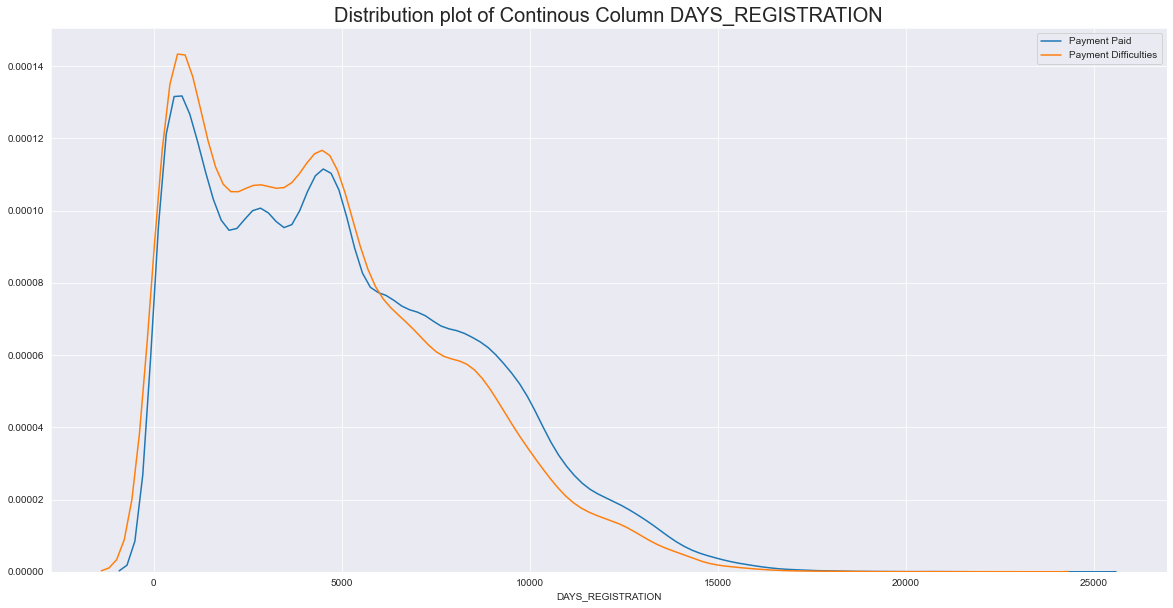

In [55]:
# let's plot the univariate continous analysis for DAYS_REGISTRATION

univ_plot_con('DAYS_REGISTRATION')

<div class="alert alert-block alert-info">
    <span style='font-family:Georgia'>
        <b>Inferences: </b> 
         <li> We can see that the graph is right skewed</li>
        <li> Days of registration for both the targets have almost same pattern of distribution</li>
    </span>    
</div>

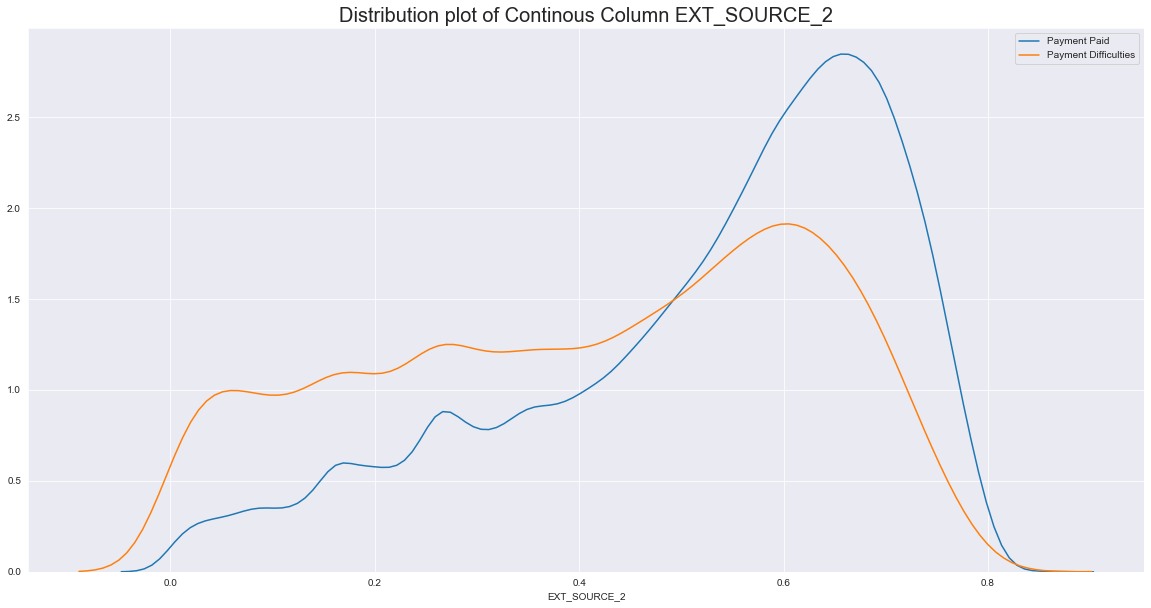

In [56]:
# let's plot the univariate continous analysis for EXT_SOURCE_2

univ_plot_con('EXT_SOURCE_2')

<div class="alert alert-block alert-info">
    <span style='font-family:Georgia'>
        <b>Inferences: </b> 
         <li> We can see that the graph is left skewed</li>
        <li> EXT Source2 doesn't have a relevant pattern of distribution</li>
    </span>    
</div>

### 4.4 Correlation 

In [57]:
# let's check the correlation of target variables of numeric values

corr_t0= df_target0.corr()

corr_t1= df_target1.corr()

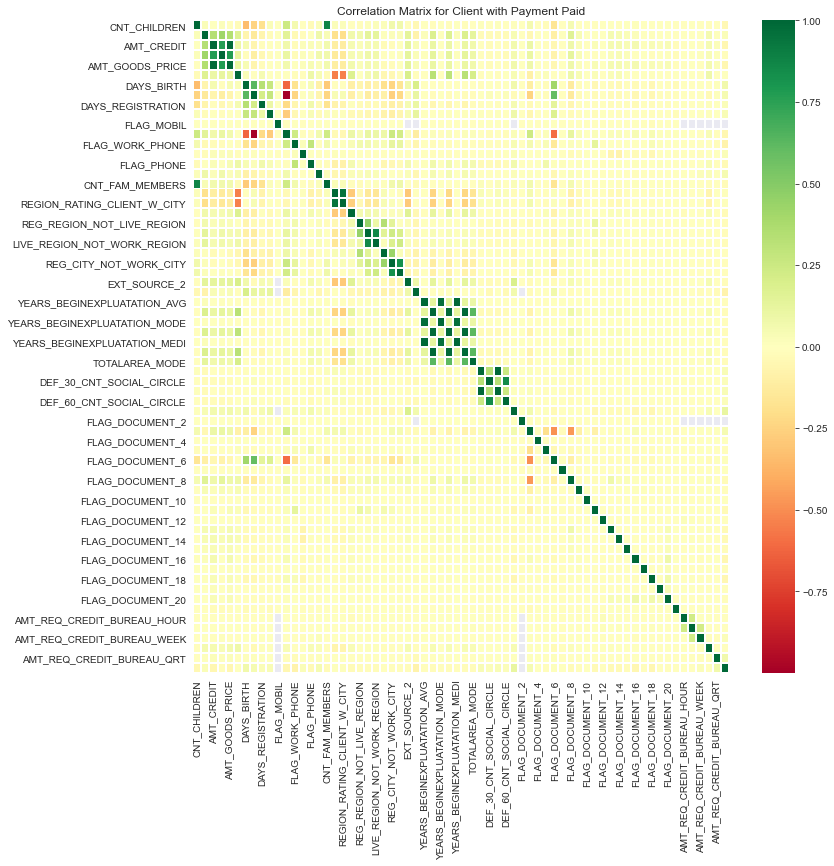

In [58]:
# let's plot the Correlation matrix using heatmaps for target0

fig = plt.figure(figsize=(12,12))
ax = sns.heatmap(corr_t0, cmap="RdYlGn",annot=False,linewidth =1)
ax.set_title("Correlation Matrix for Client with Payment Paid")
plt.show()

<div class="alert alert-block alert-info">
    <span style='font-family:Georgia'>
        <b>Inferences: </b> 
        <br>Correlating factors of clients with paid payments:<br>
            Credit amount is highly correlated with
            <ul>                
                <li> amount of goods price</li>
                <li> loan annuity</li>
                <li> total income</li>
    </span>    
</div>

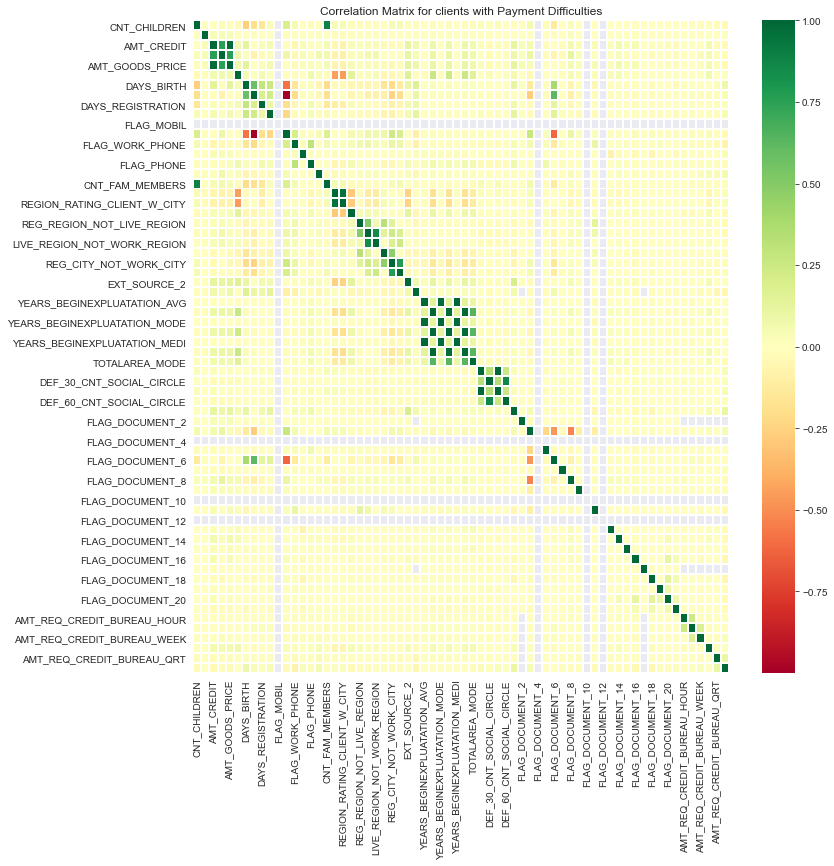

In [59]:
# let's plot the Correlation matrix using heatmaps for target1

fig = plt.figure(figsize=(12,12))
ax = sns.heatmap(corr_t1, cmap="RdYlGn",annot=False,linewidth=1)
ax.set_title("Correlation Matrix for clients with Payment Difficulties")
plt.show()

<div class="alert alert-block alert-info">
    <span style='font-family:Georgia'>
        <b>Inferences: </b> 
        <br>Correlating factors of clients with payment difficulties:<br>
        <ul>
            <li> Credit amount is highly correlated with amount of goods price which is same as payment paid clients. </li>
            <li> Count of children and count of family members follow positive correlation </li>
        </ul>
    </span>    
</div>

In [60]:
# let's find the top 10 correlated columns using a function 

def corr_top10(df_corr):
    df_corr= df_corr.unstack().reset_index()
    
    df_corr= df_corr.sort_values(by= 0, ascending= False)
    df_corr= df_corr[df_corr[0]<1]
    
    df_corr.dropna(axis= 0, how= 'any', inplace= True)
    df_corr= df_corr.iloc[0:20:2]
    df_corr.columns= ['Column 1', 'Column 2','Correlation Value']
    
    return df_corr

In [61]:
# let's get top 10 correlation columns for df_target0

corr_t0_t10= corr_top10(corr_t0)

In [62]:
corr_t0_t10

Column 1                      Column 2  \
2477      OBS_60_CNT_SOCIAL_CIRCLE      OBS_30_CNT_SOCIAL_CIRCLE   
2207                FLOORSMAX_MEDI                 FLOORSMAX_AVG   
1880   YEARS_BEGINEXPLUATATION_AVG  YEARS_BEGINEXPLUATATION_MEDI   
2209                FLOORSMAX_MEDI                FLOORSMAX_MODE   
266                AMT_GOODS_PRICE                    AMT_CREDIT   
2075                FLOORSMAX_MODE                 FLOORSMAX_AVG   
2008  YEARS_BEGINEXPLUATATION_MODE   YEARS_BEGINEXPLUATATION_AVG   
2142  YEARS_BEGINEXPLUATATION_MEDI  YEARS_BEGINEXPLUATATION_MODE   
1140          REGION_RATING_CLIENT   REGION_RATING_CLIENT_W_CITY   
1056               CNT_FAM_MEMBERS                  CNT_CHILDREN   

      Correlation Value  
2477             0.9985  
2207             0.9970  
1880             0.9936  
2209             0.9882  
266              0.9873  
2075             0.9856  
2008             0.9710  
2142             0.9621  
1140             0.9501  
1056             0.8786

In [63]:
# let's get top 10 correlation columns for df_target1

corr_t1_t10= corr_top10(corr_t1)

In [64]:
corr_t1_t10

Column 1                      Column 2  \
2477      OBS_60_CNT_SOCIAL_CIRCLE      OBS_30_CNT_SOCIAL_CIRCLE   
1947                 FLOORSMAX_AVG                FLOORSMAX_MEDI   
2140  YEARS_BEGINEXPLUATATION_MEDI   YEARS_BEGINEXPLUATATION_AVG   
2079                FLOORSMAX_MODE                FLOORSMAX_MEDI   
1945                 FLOORSMAX_AVG                FLOORSMAX_MODE   
266                AMT_GOODS_PRICE                    AMT_CREDIT   
2008  YEARS_BEGINEXPLUATATION_MODE   YEARS_BEGINEXPLUATATION_AVG   
2012  YEARS_BEGINEXPLUATATION_MODE  YEARS_BEGINEXPLUATATION_MEDI   
1140          REGION_RATING_CLIENT   REGION_RATING_CLIENT_W_CITY   
16                    CNT_CHILDREN               CNT_FAM_MEMBERS   

      Correlation Value  
2477             0.9983  
1947             0.9972  
2140             0.9961  
2079             0.9892  
1945             0.9866  
266              0.9831  
2008             0.9805  
2012             0.9781  
1140             0.9566  
16               0.8855

### 4.5 Bivariate Analysis for Application Data

<h3>   
      <font color = purple >
            <span style='font-family:Georgia'>
              4.5.1 Continous v/s Continous 
            </span>   
        </font>    
</h3>

In [65]:
# defining a function for the bivariate continous v/s continous analysis

def biv_con_con(col1, col2): 
    
    print('Scatter Plot distributions of two targets for columns '+col1+' & '+col2)
    
    plt.figure(figsize= [20,8])
    
    ax= plt.subplot(1,2,1)
    plt.title('Payment Paid')
    sns.scatterplot(data= df_target0, x= col1, y= col2, ax= ax)
    ax= plt.subplot(1,2,2)
    plt.title('Payment Difficulties')
    sns.scatterplot(data= df_target1, x= col1, y= col2, ax= ax)
    
    plt.show()

Scatter Plot distributions of two targets for columns AMT_GOODS_PRICE & AMT_CREDIT


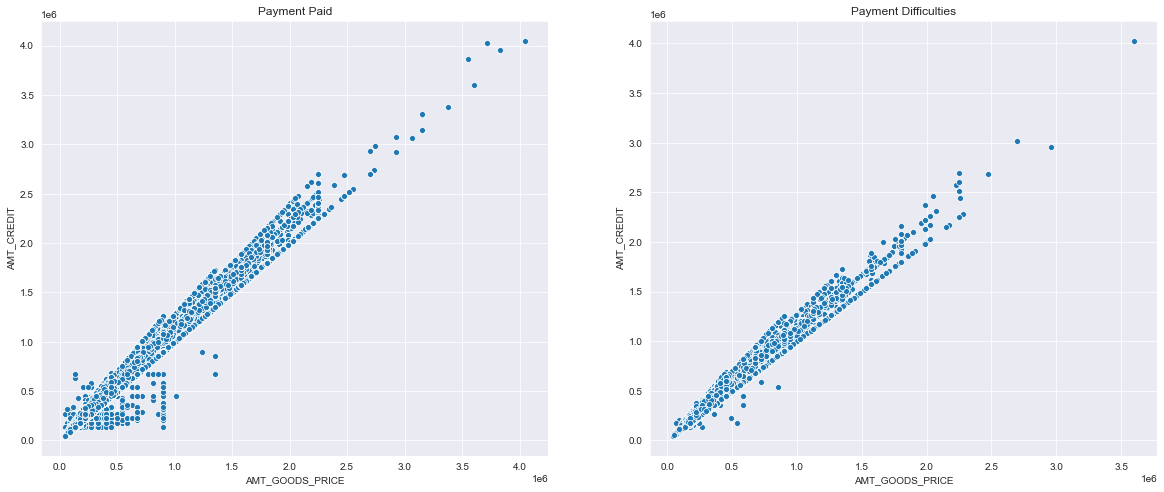

In [66]:
# plotting bivariate cont/cont between AMT_GOODS_PRICE, AMT_CREDIT

biv_con_con('AMT_GOODS_PRICE','AMT_CREDIT')

<div class="alert alert-block alert-info">
    <span style='font-family:Georgia'>
        <b>Inferences: </b> 
         <li>As the pattern of graphs are same for both the targets, AMT_GOODS_PRICE are almost equal to AMT_CREDIT</li>
        <li> AMT_GOODS_PRICE and AMT_CREDIT follow a <b>linear relationship<b/> </li>
    </span>    
</div>

Scatter Plot distributions of two targets for columns AMT_CREDIT & AMT_INCOME_TOTAL


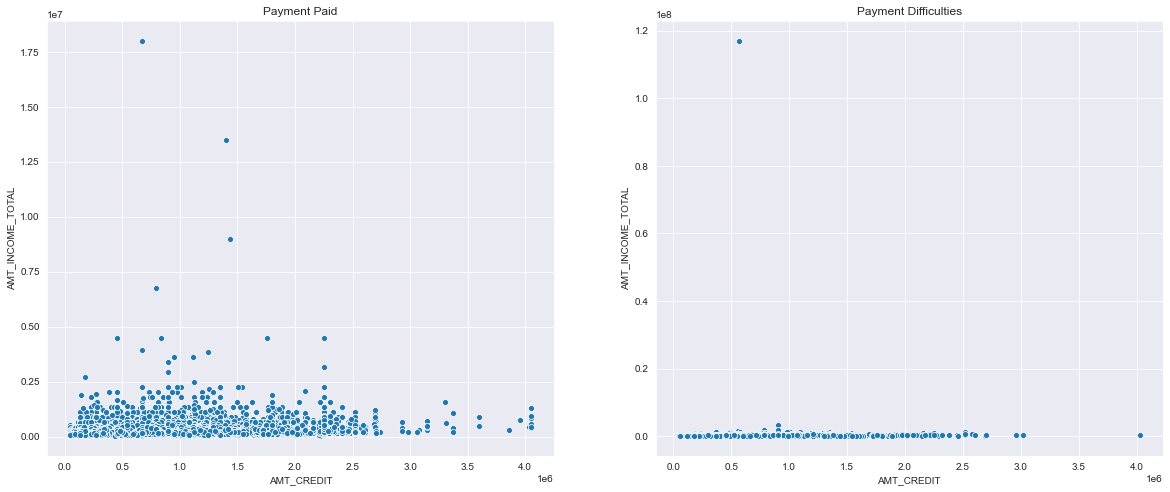

In [67]:
# plotting bivariate cont/cont between AMT_CREDIT, AMT_INCOME_TOTAL

biv_con_con('AMT_CREDIT','AMT_INCOME_TOTAL')

<div class="alert alert-block alert-info">
    <span style='font-family:Georgia'>
        <b>Inferences: </b> 
         <li>Credit Amount for clients who are repayers is clustered between 0-25 Lac </li>
        <li> Credit Amount for clients who have payment difficulties follows straight line between 0-25 Lac </li>
        <li>There are more number of outliers in the scatter plot of repayers than the clients with payment difficulties.  </li>
    </span>    
</div>

Scatter Plot distributions of two targets for columns CNT_CHILDREN & CNT_FAM_MEMBERS


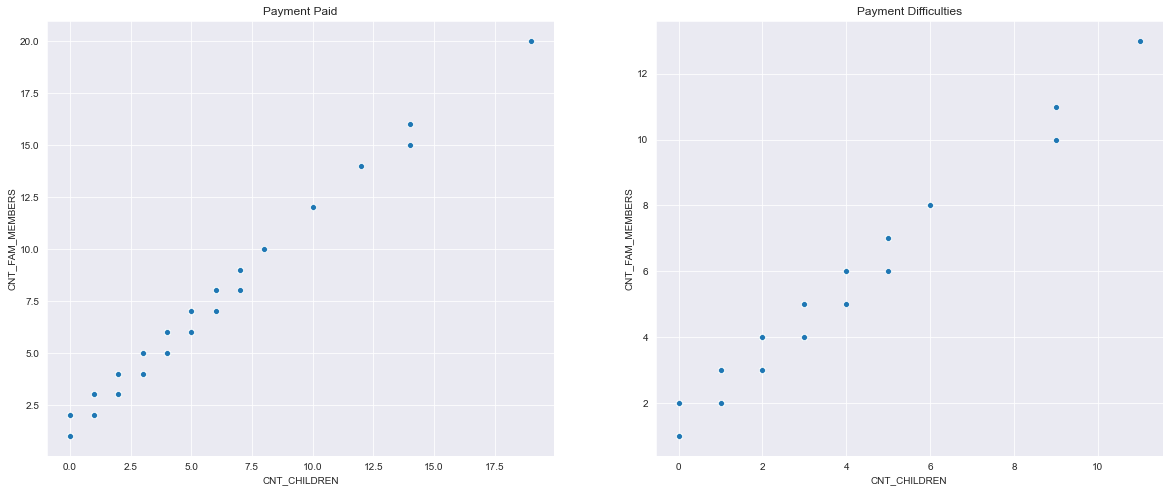

In [68]:
# plotting bivariate cont/cont between CNT_CHILDREN, CNT_FAM_MEMBERS

biv_con_con('CNT_CHILDREN','CNT_FAM_MEMBERS')

<div class="alert alert-block alert-info">
    <span style='font-family:Georgia'>
        <b>Inferences: </b> 
         <li> Count of children and count of family members follow positive correlation </li>
        <li> Count of children and count of family members have a <b>Linear relationship </b></li>
    </span>    
</div>

Scatter Plot distributions of two targets for columns OBS_60_CNT_SOCIAL_CIRCLE & OBS_30_CNT_SOCIAL_CIRCLE


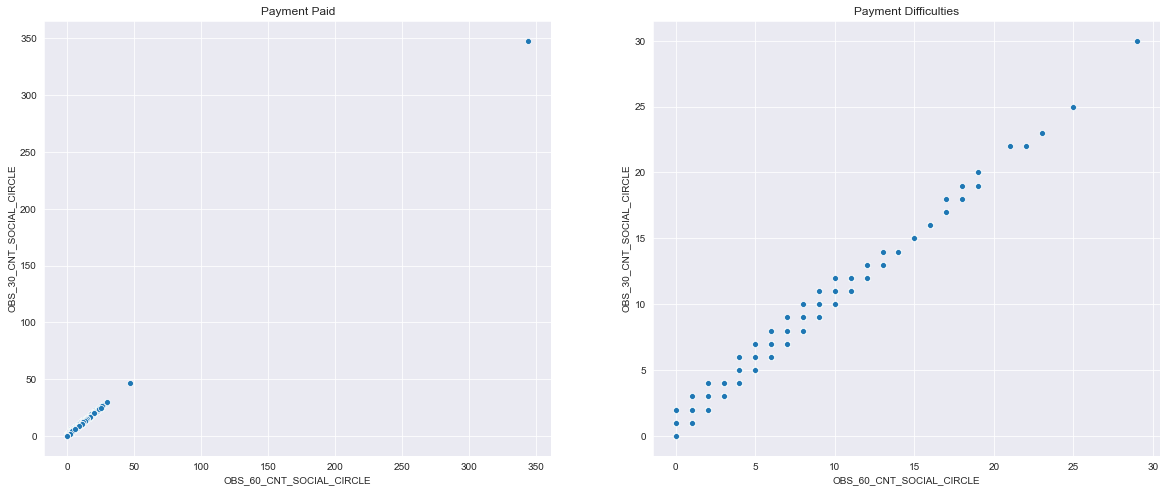

In [69]:
# plotting bivariate cont/cont between OBS_60_CNT_SOCIAL_CIRCLE, OBS_30_CNT_SOCIAL_CIRCLE

biv_con_con('OBS_60_CNT_SOCIAL_CIRCLE','OBS_30_CNT_SOCIAL_CIRCLE')

<div class="alert alert-block alert-info">
    <span style='font-family:Georgia'>
        <b>Inferences: </b> 
         <li> Observed Social circle Count 60 and  Observed Social circle Count 30 follow positive correlation for both target variables</li>
        <li> For repayers curve, values are clustered in linear fashion till 50 while this is not the case in payment difficulties curve</li>
    </span>    
</div>

Scatter Plot distributions of two targets for columns DAYS_BIRTH & AMT_CREDIT


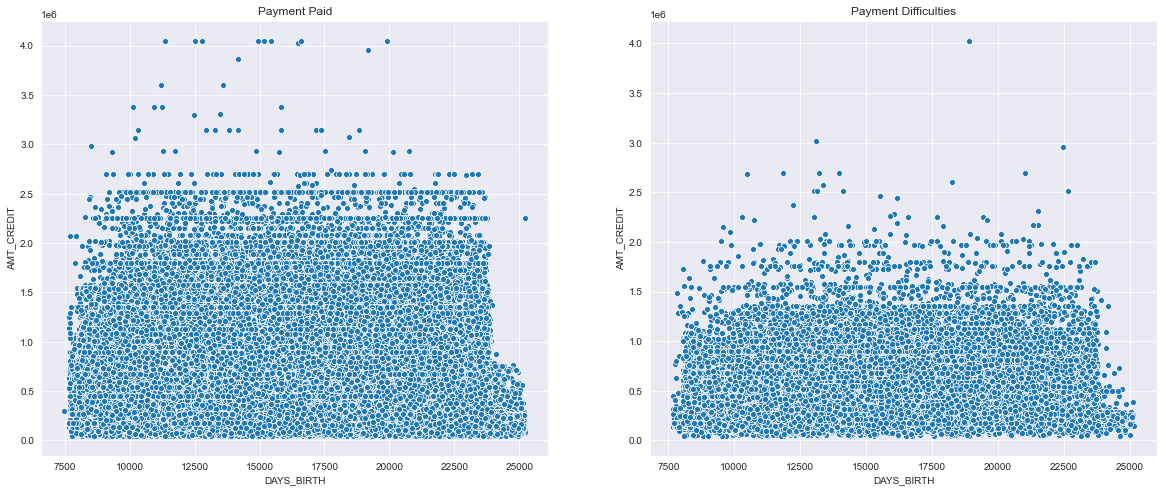

In [70]:
# plotting bivariate cont/cont between DAYS_BIRTH, AMT_CREDIT

biv_con_con('DAYS_BIRTH','AMT_CREDIT')

<div class="alert alert-block alert-info">
    <span style='font-family:Georgia'>
        <b>Inferences: </b> 
         <li>There is a strong correlation between age(DAYS_BIRTH column) and loan amount credited for both the targets</li>
        <li> There are more number of outliers in the scatter plot of repayers than the clients with payment difficulties.</li>
    </span>    
</div>

<h3>   
      <font color = purple >
            <span style='font-family:Georgia'>
              4.5.2 Continous v/s Categorical 
            </span>   
        </font>    
</h3>

In [71]:
# defining a function for the bivariate continous v/s categorical analysis

def biv_con_cat(col1, col2): 
    print('Box Plot distributions of two targets for columns '+col1+' & '+col2)
        
    plt.figure(figsize= [20,8])
    ax= plt.subplot(1,2,1)
    plt.title('Payment Paid')
    sns.boxplot(data= df_target0[df_target0[col2]<df_target0[col2].quantile(0.995)], x= col1, y= col2)
    ax= plt.subplot(1,2,2)
    plt.title('Payment Difficulties')
    sns.boxplot(data= df_target1[df_target1[col2]<df_target1[col2].quantile(0.995)], x= col1, y= col2)
    plt.show()

Box Plot distributions of two targets for columns CODE_GENDER & AMT_INCOME_TOTAL


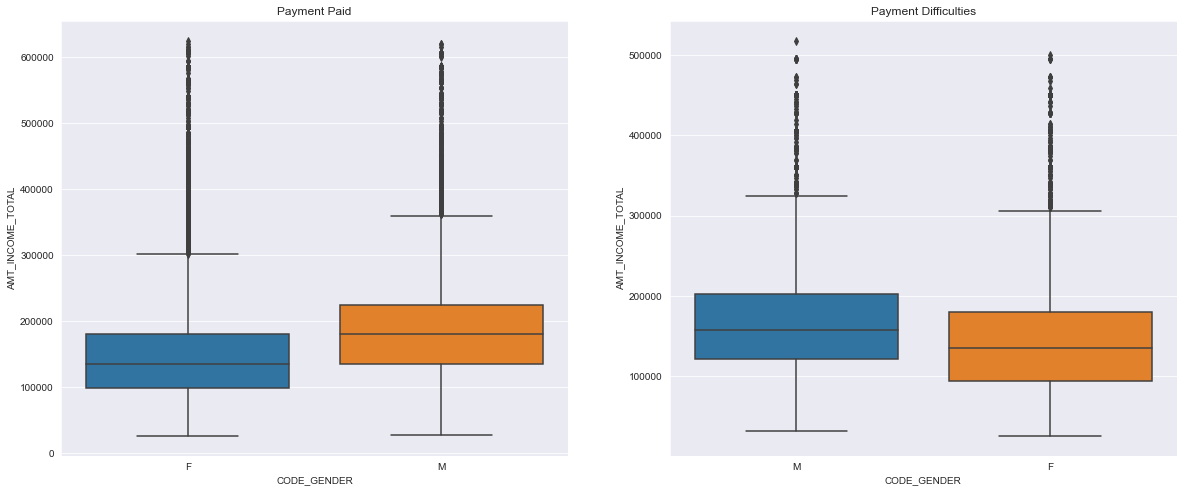

In [72]:
# plotting bivariate cont/cat between CODE_GENDER, AMT_INCOME_TOTAL

biv_con_cat('CODE_GENDER','AMT_INCOME_TOTAL')

<div class="alert alert-block alert-info">
    <span style='font-family:Georgia'>
        <b>Inferences: </b> 
         <li> Medium values for Males of both target variables is more than females ie. Males have more income than females.</li>
        <li> Interquartile range of Males in repayers plot is less than the defaulters plot</li>
    </span>    
</div>

Box Plot distributions of two targets for columns CODE_GENDER & AMT_CREDIT


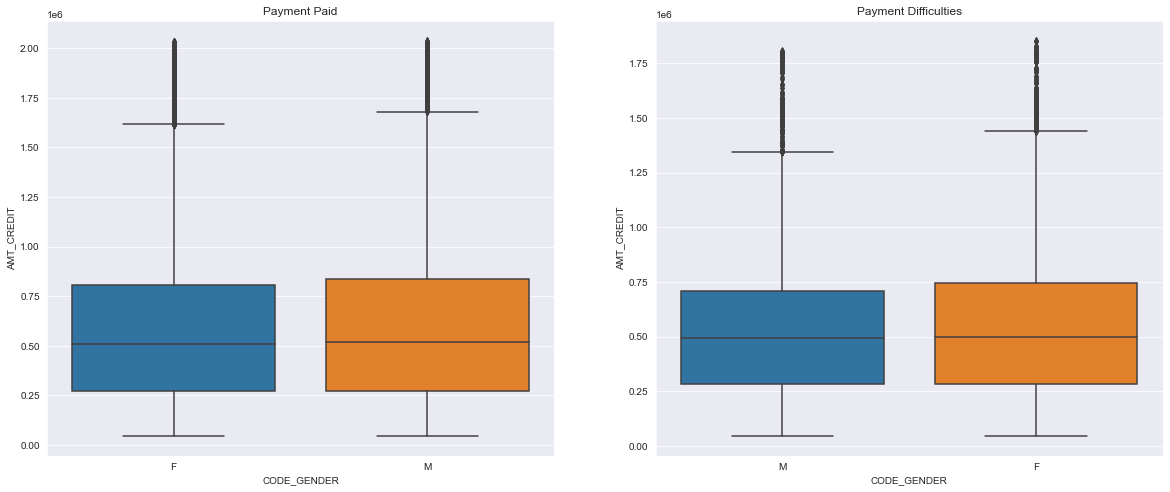

In [73]:
# plotting bivariate cont/cat between CODE_GENDER, AMT_CREDIT

biv_con_cat('CODE_GENDER','AMT_CREDIT')

<div class="alert alert-block alert-info">
    <span style='font-family:Georgia'>
        <b>Inferences: </b> 
         <li> Medium for Males of both target variables is nearly same as females but the IQR ranges are different for the amount credit. </li>
        <li> Box plots are not much skewed.</li>
        <li> Interquartile range of Males in repayers plot is in between 25-75Lac while than the in defaulters plot it is less value.</li>
    </span>    
</div>

Box Plot distributions of two targets for columns FLAG_OWN_CAR & AMT_INCOME_TOTAL


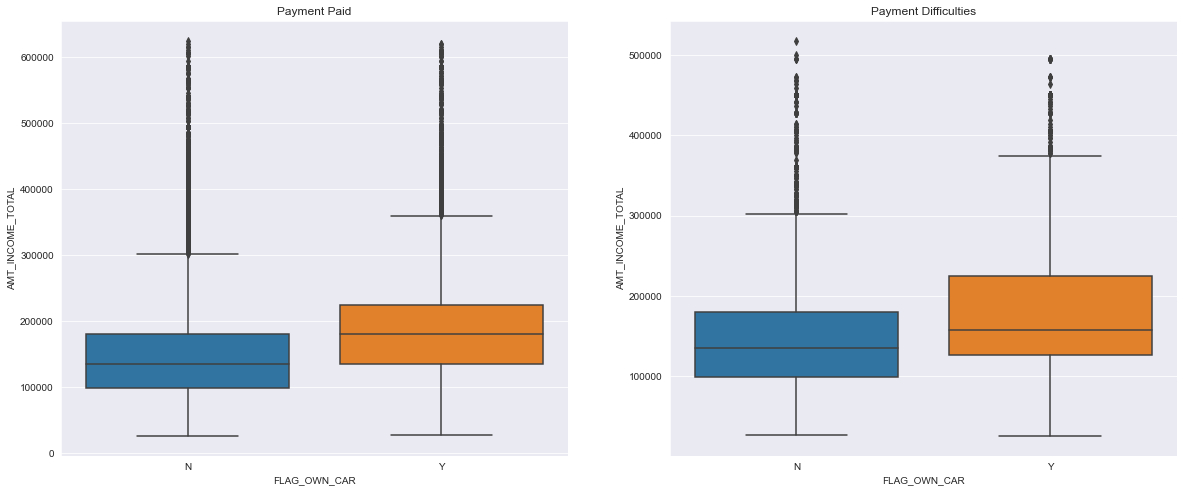

In [74]:
# plotting bivariate cont/cat between FLAG_OWN_CAR, AMT_INCOME_TOTAL

biv_con_cat('FLAG_OWN_CAR','AMT_INCOME_TOTAL')

<div class="alert alert-block alert-info">
    <span style='font-family:Georgia'>
        <b>Inferences: </b> 
         <li> clients who own car have high income for both target variables </li>
        <li> Box plot for people who own car is righr skewed for defaulters.</li>
    </span>    
</div>

Box Plot distributions of two targets for columns NAME_INCOME_TYPE & AMT_CREDIT


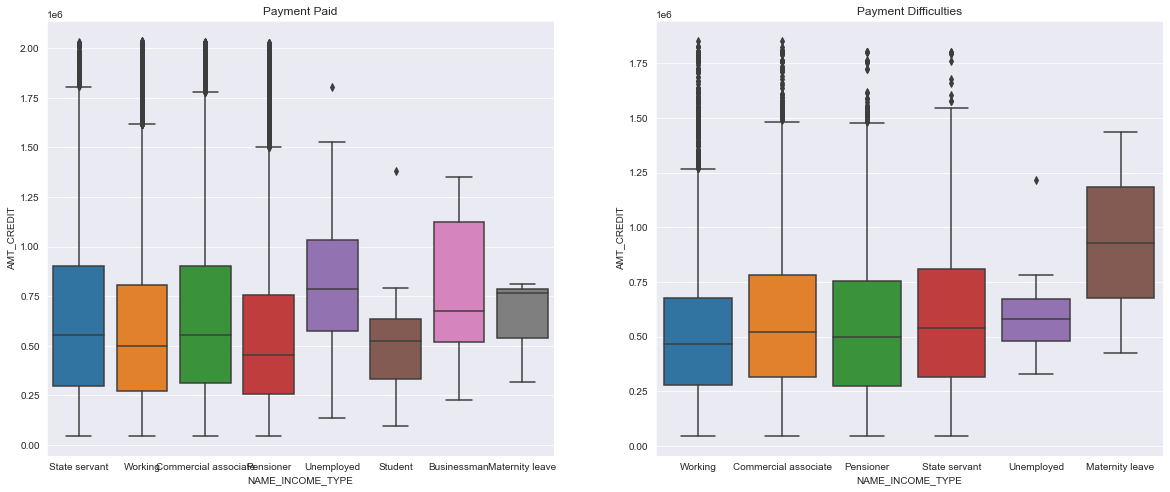

In [75]:
# plotting bivariate cont/cat between NAME_INCOME_TYPE, AMT_CREDIT

biv_con_cat('NAME_INCOME_TYPE','AMT_CREDIT')

<div class="alert alert-block alert-info">
    <span style='font-family:Georgia'>
        <b>Inferences: </b> 
         <li>People who are on Maternity leave or unemployed have high chances of being the defaulters. </li>
        <li> Student and Businessmen do not have any default record. Thus these two category are safe categories for providing loan.</li>
    </span>    
</div>

Box Plot distributions of two targets for columns NAME_CONTRACT_TYPE & AMT_CREDIT


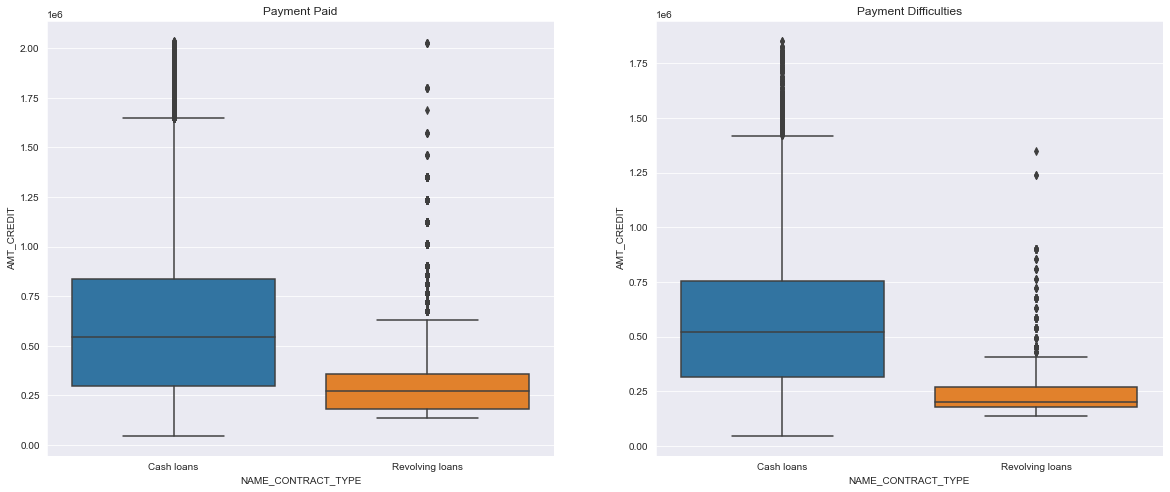

In [76]:
# plotting bivariate cont/cat between NAME_CONTRACT_TYPE, AMT_CREDIT

biv_con_cat('NAME_CONTRACT_TYPE','AMT_CREDIT')

<div class="alert alert-block alert-info">
    <span style='font-family:Georgia'>
        <b>Inferences: </b> 
         <li>People getting credit amount as revolving loans is less for both target varibles. </li>
        <li> There are more number of outliers for revolving loans for both target varibles.</li>
    </span>    
</div>

<h3>   
      <font color = purple >
            <span style='font-family:Georgia'>
             4.5.3 Categorical v/s Categorical 
            </span>   
        </font>    
</h3>

In [77]:
# defining a function for the bivariate continous v/s categorical analysis

def biv_cat_cat(col1, col2): 
    print('Count Plot distributions of two targets for columns '+col1+' & '+col2)
        
    plt.figure(figsize= [20,8])
    ax= plt.subplot(1,2,1)
    plt.title('Payment Paid')
    sns.countplot(data= df_target0, x= col1, hue= col2)
    ax= plt.subplot(1,2,2)
    plt.title('Payment Difficulties')
    sns.countplot(data= df_target1, x= col1, hue= col2)
    plt.show()

Count Plot distributions of two targets for columns CODE_GENDER & NAME_CONTRACT_TYPE


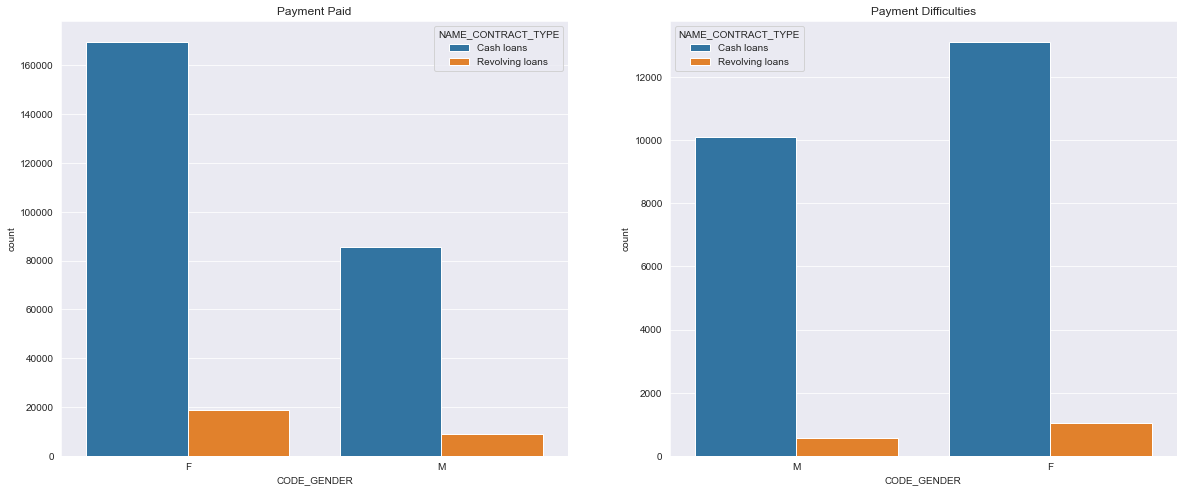

In [78]:
# plotting bivariate cont/cat between CODE_GENDER, NAME_CONTRACT_TYPE

biv_cat_cat('CODE_GENDER','NAME_CONTRACT_TYPE')

<div class="alert alert-block alert-info">
    <span style='font-family:Georgia'>
        <b>Inferences: </b> 
         <li> More number of Females have opted cash loans compared to males in both target varibles. </li>
        <li> Females have more chances of being defaulters whether they opt case loans or revolving loans.</li>
    </span>    
</div>

Count Plot distributions of two targets for columns CODE_GENDER & NAME_INCOME_TYPE


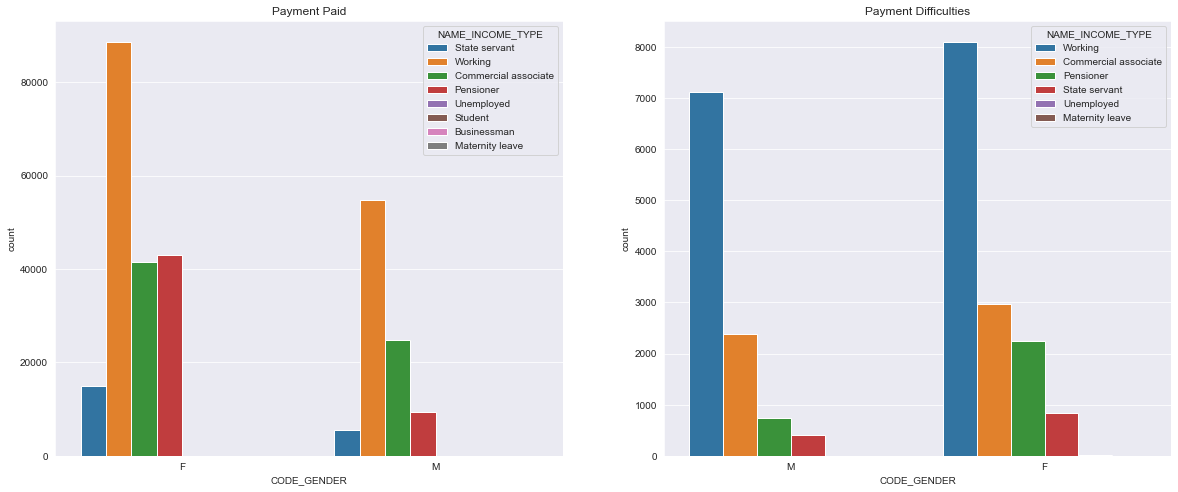

In [79]:
# plotting bivariate cont/cat between CODE_GENDER, NAME_CONTRACT_TYPE

biv_cat_cat('CODE_GENDER','NAME_INCOME_TYPE')

<div class="alert alert-block alert-info">
    <span style='font-family:Georgia'>
        <b>Inferences: </b> 
         <li> More number of Females are working compared to males in both target varibles. </li>
        <li> working Females have more chances of being defaulters.</li>
    </span>    
</div>

Count Plot distributions of two targets for columns AGE & NAME_INCOME_TYPE


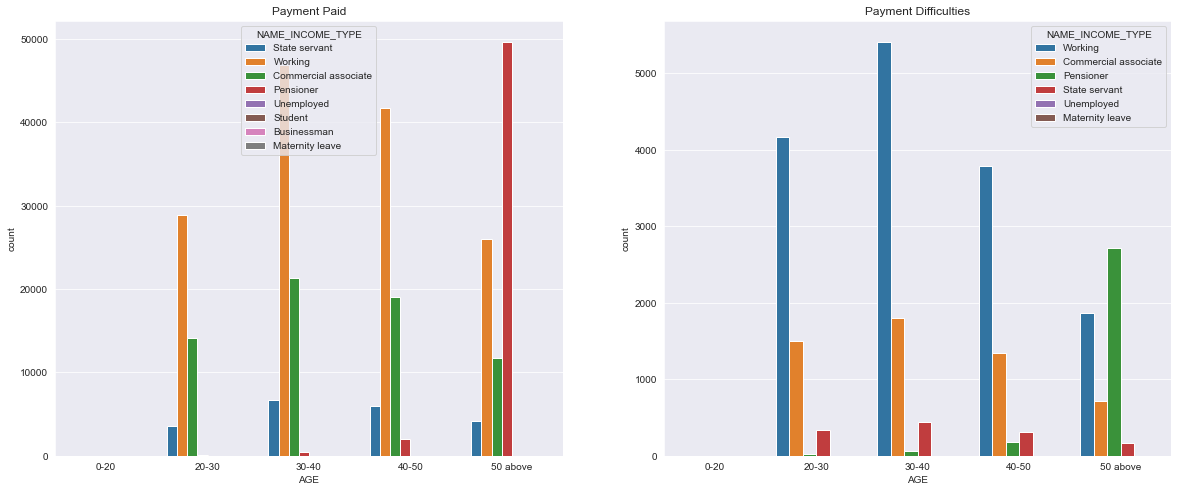

In [80]:
# plotting bivariate cont/cat between AGE, NAME_INCOME_TYPE

biv_cat_cat('AGE','NAME_INCOME_TYPE')

<div class="alert alert-block alert-info">
    <span style='font-family:Georgia'>
        <b>Inferences: </b> 
         <li> working People between age group 30-40 are more likely to be the defaulters. </li>
        <li> Pensioners above age 50 are more likely to be the defaulters.  </li>
    </span>    
</div>

Count Plot distributions of two targets for columns CREDIT_RANGE & FLAG_OWN_REALTY


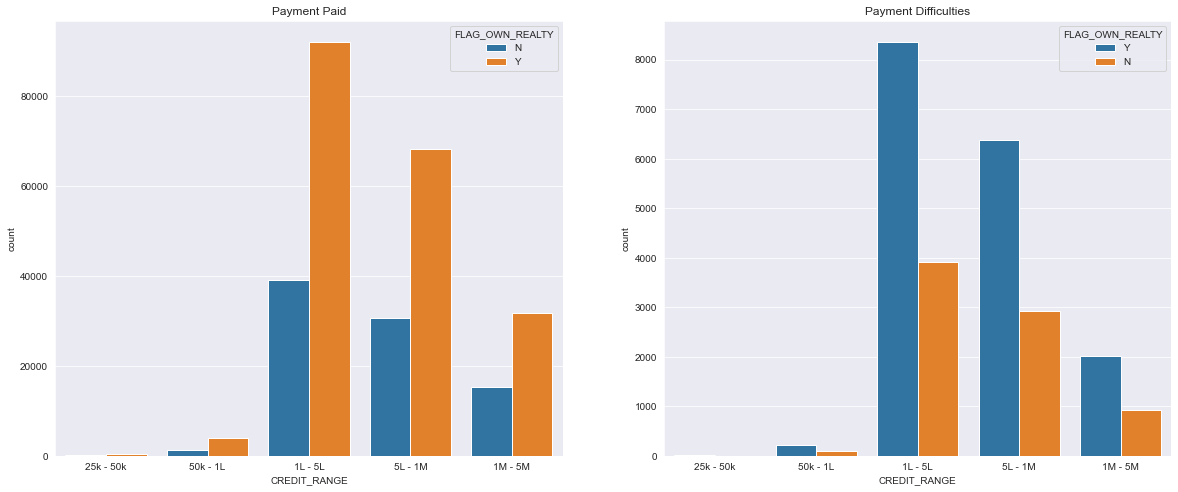

In [81]:
# plotting bivariate cont/cat between CREDIT_RANGE, FLAG_OWN_REALTY

biv_cat_cat('CREDIT_RANGE','FLAG_OWN_REALTY')

<div class="alert alert-block alert-info">
    <span style='font-family:Georgia'>
        <b>Inferences: </b> 
         <li> People who have credit amount between 1-5 Lac are more likely to own a reality. </li>
        <li> People  who have credit amount less than 1Lac are less likely to be the defaulters.  </li>
    </span>    
</div>

Count Plot distributions of two targets for columns INCOME_RANGE & NAME_EDUCATION_TYPE


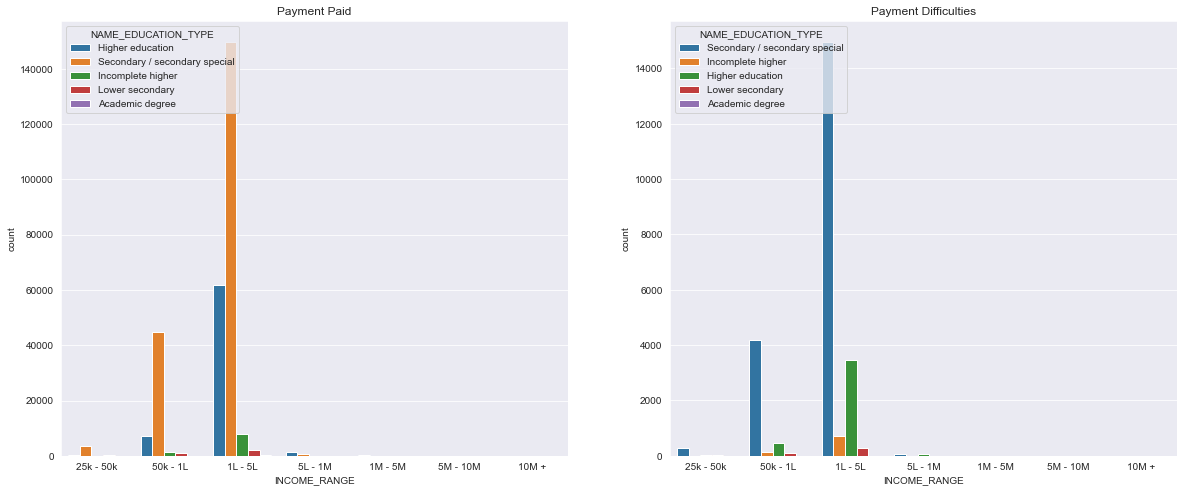

In [82]:
# plotting bivariate cont/cat between NAME_EDUCATION_TYPE, INCOME_RANGE

biv_cat_cat('INCOME_RANGE','NAME_EDUCATION_TYPE')

<div class="alert alert-block alert-info">
    <span style='font-family:Georgia'>
        <b>Inferences: </b> 
         <li> Majority of the clients have Secondary / secondary special education, followed by clients with Higher education for all income range.  </li>
        <li> People  with lower secondary education are less likely to be the defaulters.  </li>
    </span>    
</div>

<h2 name='libraries'>   
      <font color = Red >
            <span style='font-family:Georgia'>
            5. Analysing Previous DataFrame
            </span>   
        </font>    
</h2> 

In [83]:
# let's load previous_application 

df_previous= pd.read_csv('previous_application.csv')

In [84]:
# let's check head of df_previous application 

df_previous.head()

SK_ID_PREV  SK_ID_CURR NAME_CONTRACT_TYPE  AMT_ANNUITY  AMT_APPLICATION  \
0     2030495      271877     Consumer loans    1730.4300       17145.0000   
1     2802425      108129         Cash loans   25188.6150      607500.0000   
2     2523466      122040         Cash loans   15060.7350      112500.0000   
3     2819243      176158         Cash loans   47041.3350      450000.0000   
4     1784265      202054         Cash loans   31924.3950      337500.0000   

   AMT_CREDIT  AMT_DOWN_PAYMENT  AMT_GOODS_PRICE WEEKDAY_APPR_PROCESS_START  \
0  17145.0000            0.0000       17145.0000                   SATURDAY   
1 679671.0000               nan      607500.0000                   THURSDAY   
2 136444.5000               nan      112500.0000                    TUESDAY   
3 470790.0000               nan      450000.0000                     MONDAY   
4 404055.0000               nan      337500.0000                   THURSDAY   

   HOUR_APPR_PROCESS_START FLAG_LAST_APPL_PER_CONTRACT  \
0                       15                           Y   
1                       11                           Y   
2                       11                           Y   
3                        7                           Y   
4                        9                           Y   

   NFLAG_LAST_APPL_IN_DAY  RATE_DOWN_PAYMENT  RATE_INTEREST_PRIMARY  \
0                       1             0.0000                 0.1828   
1                       1                nan                    nan   
2                       1                nan                    nan   
3                       1                nan                    nan   
4                       1                nan                    nan   

   RATE_INTEREST_PRIVILEGED NAME_CASH_LOAN_PURPOSE NAME_CONTRACT_STATUS  \
0                    0.8673                    XAP             Approved   
1                       nan                    XNA             Approved   
2                       nan                    XNA             Approved   
3                       nan                    XNA             Approved   
4                       nan                Repairs              Refused   

   DAYS_DECISION      NAME_PAYMENT_TYPE CODE_REJECT_REASON  NAME_TYPE_SUITE  \
0            -73  Cash through the bank                XAP              NaN   
1           -164                    XNA                XAP    Unaccompanied   
2           -301  Cash through the bank                XAP  Spouse, partner   
3           -512  Cash through the bank                XAP              NaN   
4           -781  Cash through the bank                 HC              NaN   

  NAME_CLIENT_TYPE NAME_GOODS_CATEGORY NAME_PORTFOLIO NAME_PRODUCT_TYPE  \
0         Repeater              Mobile            POS               XNA   
1         Repeater                 XNA           Cash            x-sell   
2         Repeater                 XNA           Cash            x-sell   
3         Repeater                 XNA           Cash            x-sell   
4         Repeater                 XNA           Cash           walk-in   

              CHANNEL_TYPE  SELLERPLACE_AREA NAME_SELLER_INDUSTRY  \
0             Country-wide                35         Connectivity   
1           Contact center                -1                  XNA   
2  Credit and cash offices                -1                  XNA   
3  Credit and cash offices                -1                  XNA   
4  Credit and cash offices                -1                  XNA   

   CNT_PAYMENT NAME_YIELD_GROUP       PRODUCT_COMBINATION  DAYS_FIRST_DRAWING  \
0      12.0000           middle  POS mobile with interest         365243.0000   
1      36.0000       low_action          Cash X-Sell: low         365243.0000   
2      12.0000             high         Cash X-Sell: high         365243.0000   
3      12.0000           middle       Cash X-Sell: middle         365243.0000   
4      24.0000             high         Cash Street: high                 nan   

   D

In [85]:
# let's check the info of df_previous

df_previous.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1670214 entries, 0 to 1670213
Data columns (total 37 columns):
 #   Column                       Non-Null Count    Dtype  
---  ------                       --------------    -----  
 0   SK_ID_PREV                   1670214 non-null  int64  
 1   SK_ID_CURR                   1670214 non-null  int64  
 2   NAME_CONTRACT_TYPE           1670214 non-null  object 
 3   AMT_ANNUITY                  1297979 non-null  float64
 4   AMT_APPLICATION              1670214 non-null  float64
 5   AMT_CREDIT                   1670213 non-null  float64
 6   AMT_DOWN_PAYMENT             774370 non-null   float64
 7   AMT_GOODS_PRICE              1284699 non-null  float64
 8   WEEKDAY_APPR_PROCESS_START   1670214 non-null  object 
 9   HOUR_APPR_PROCESS_START      1670214 non-null  int64  
 10  FLAG_LAST_APPL_PER_CONTRACT  1670214 non-null  object 
 11  NFLAG_LAST_APPL_IN_DAY       1670214 non-null  int64  
 12  RATE_DOWN_PAYMENT            774370 non-nu

In [86]:
# let's describe the df_previous 

df_previous.describe(include= 'all')

SK_ID_PREV   SK_ID_CURR NAME_CONTRACT_TYPE  AMT_ANNUITY  \
count  1670214.0000 1670214.0000            1670214 1297979.0000   
unique          nan          nan                  4          nan   
top             nan          nan         Cash loans          nan   
freq            nan          nan             747553          nan   
mean   1923089.1353  278357.1741                NaN   15955.1207   
std     532597.9587  102814.8238                NaN   14782.1373   
min    1000001.0000  100001.0000                NaN       0.0000   
25%    1461857.2500  189329.0000                NaN    6321.7800   
50%    1923110.5000  278714.5000                NaN   11250.0000   
75%    2384279.7500  367514.0000                NaN   20658.4200   
max    2845382.0000  456255.0000                NaN  418058.1450   

        AMT_APPLICATION   AMT_CREDIT  AMT_DOWN_PAYMENT  AMT_GOODS_PRICE  \
count      1670214.0000 1670213.0000       774370.0000     1284699.0000   
unique              nan          nan               nan              nan   
top                 nan          nan               nan              nan   
freq                nan          nan               nan              nan   
mean        175233.8604  196114.0212         6697.4021      227847.2793   
std         292779.7624  318574.6165        20921.4954      315396.5579   
min              0.0000       0.0000           -0.9000           0.0000   
25%          18720.0000   24160.5000            0.0000       50841.0000   
50%          71046.0000   80541.0000         1638.0000      112320.0000   
75%         180360.0000  216418.5000         7740.0000      234000.0000   
max        6905160.0000 6905160.0000      3060045.0000     6905160.0000   

       WEEKDAY_APPR_PROCESS_START  HOUR_APPR_PROCESS_START  \
count                     1670214             1670214.0000   
unique                          7                      nan   
top                       TUESDAY                      nan   
freq                       255118                      nan   
mean                          NaN                  12.4842   
std                           NaN                   3.3340   
min                           NaN                   0.0000   
25%                           NaN                  10.0000   
50%                           NaN                  12.0000   
75%                           NaN                  15.0000   
max                           NaN                  23.0000   

       FLAG_LAST_APPL_PER_CONTRACT  NFLAG_LAST_APPL_IN_DAY  RATE_DOWN_PAYMENT  \
count                      1670214            1670214.0000        774370.0000   
unique                           2                     nan                nan   
top                              Y                     nan                nan   
freq                       1661739                     nan                nan   
mean                           NaN                  0.9965             0.0796   
std                            NaN                  0.0593             0.1078   
min                            NaN                  0.0000            -0.0000   
25%                            NaN                  1.0000             0.0000   
50%                            NaN                  1.0000             0.0516   
75%                            NaN                  1.0000             0.1089   
max                            NaN                  1.0000             1.0000   

        RATE_INTEREST_PRIMARY  RATE_INTEREST_PRIVILEGED  \
count               5951.0000                 5951.0000   
unique                    nan                       nan   
top                       nan                       nan   
freq                      nan                       nan   
mean                   0.1884                    0.7735   
std                    0.0877                    0.1009   
min                    0.0348                    0.3732   
25%                    0.1607                    0.7156   
50%                    0.1891             

In [87]:
# let's replace all XNA & XAP with nulls as it's Not Applicable 

df_previous.replace(['XNA','XAP'], np.NaN, inplace= True)

<h2 name='libraries'>   
      <font color = Red >
            <span style='font-family:Georgia'>
            6. Univariate and Bivariate Analysis for Previous Dataset
            </span>   
        </font>    
</h2> 

<h3>   
      <font color = purple >
            <span style='font-family:Georgia'>
             6.1 Categorical Univariate Analysis
            </span>   
        </font>    
</h3>

In [88]:
# defining a function for the univariate categorical analysis

def univ_prev_cat(col): 
    
    fig= px.bar(x= df_previous[col].value_counts().index, 
                y= df_previous[col].value_counts(), 
                color= df_previous[col].value_counts(),
                text= df_previous[col].value_counts())
    
    fig.update_traces(texttemplate='%{text:.2s}', textposition='outside')
    fig.update_layout(title_text = 'Value Counts of Category Column'+' '+ col, height= 300)
    fig.show()

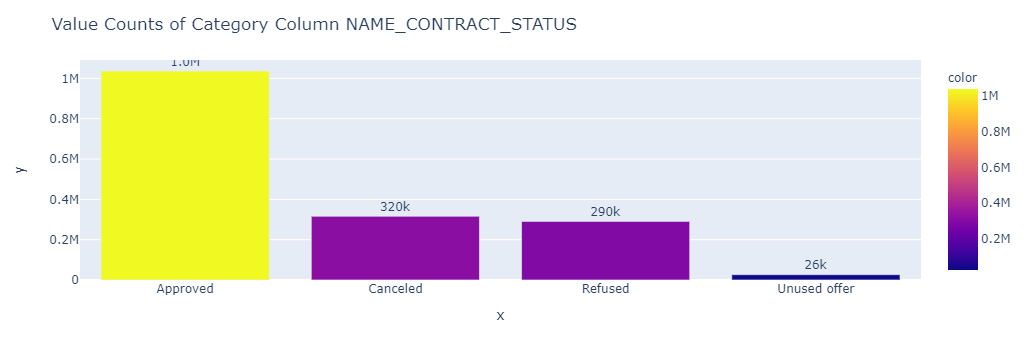

In [89]:
univ_prev_cat('NAME_CONTRACT_STATUS')

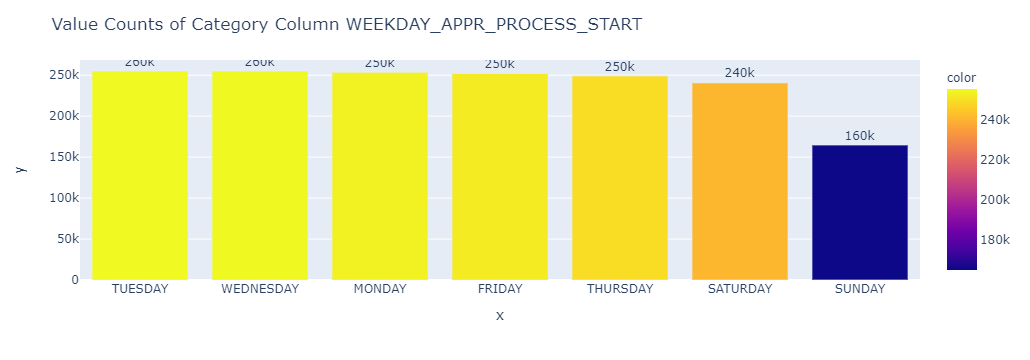

In [90]:
univ_prev_cat('WEEKDAY_APPR_PROCESS_START')

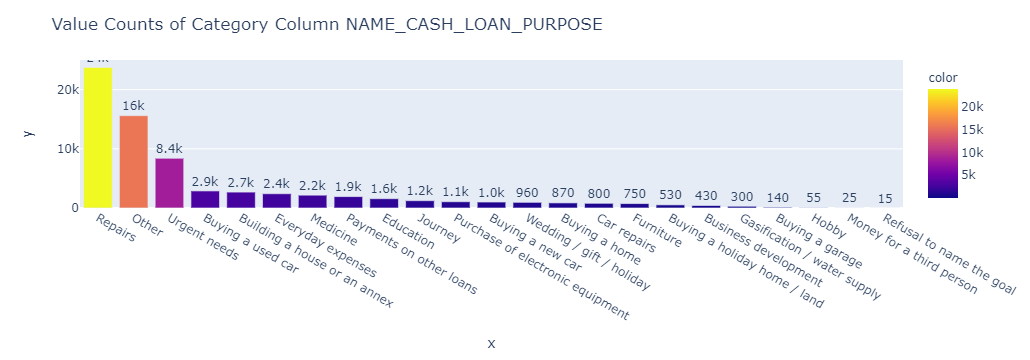

In [91]:
univ_prev_cat('NAME_CASH_LOAN_PURPOSE')

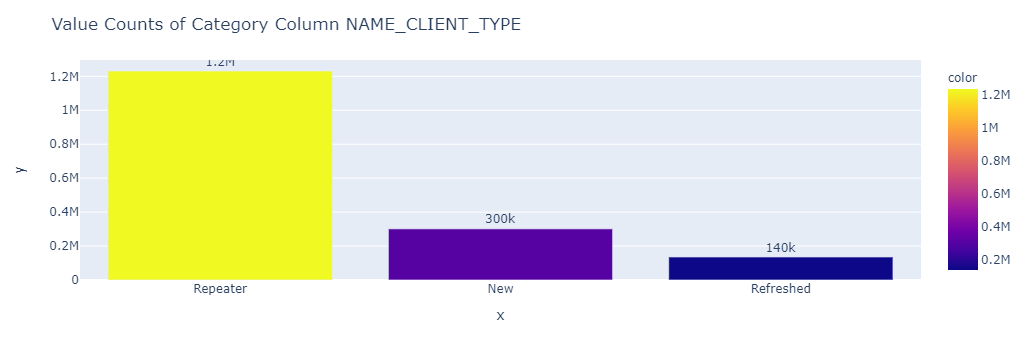

In [92]:
univ_prev_cat('NAME_CLIENT_TYPE')

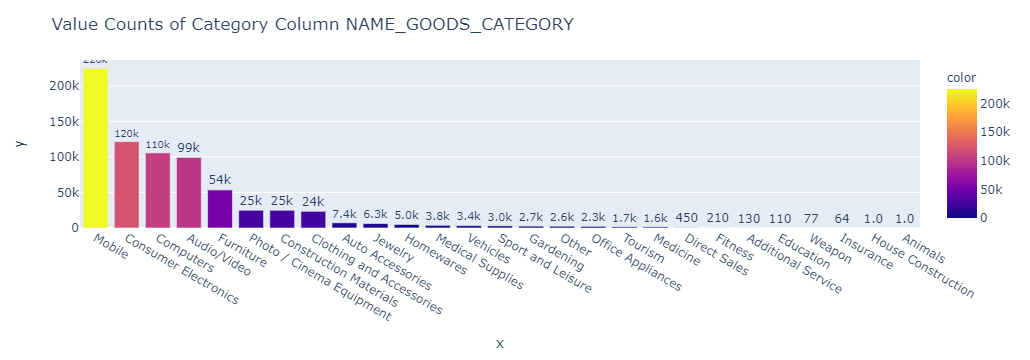

In [93]:
univ_prev_cat('NAME_GOODS_CATEGORY')

<div class="alert alert-block alert-info">
    <span style='font-family:Georgia'>
        <b>Inferences: </b> <br>  Univariate Categorical Analysis:
      <ul>
     <li> Around 1M loans have been approved in previous years. </li>
     <li> Most of the loan applications have been processed throughout Monday to Saturday.</li>
     <li> Highest number of loan applications have been applied for the purpose of Repairs.  </li>
     <li> Most of the loan applications have been applied by the already existing clients.</li>
     <li> Most of the loan applications were processed for Mobile and Customer EI goods type. </li>
       </ul>
    </span>    
</div>

<h3>   
      <font color = purple >
            <span style='font-family:Georgia'>
               6.2 Continous Univariate Analysis
            </span>   
        </font>    
</h3>

In [94]:
# defining a function for the univariate continous analysis

def univ_prev_con(col):
    
    plt.figure(figsize= [20,8])
    
    plt.subplot(1,2,1)
    sns.distplot(df_previous[col].dropna(), hist= False)
    plt.title('Distribution Plot of the Column '+col)

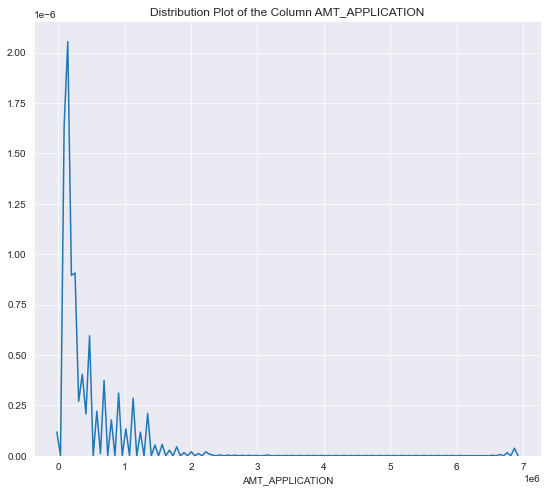

In [95]:
univ_prev_con('AMT_APPLICATION')

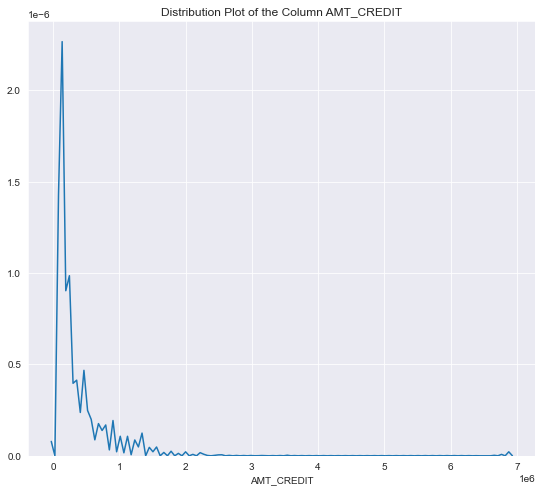

In [96]:
univ_prev_con('AMT_CREDIT')

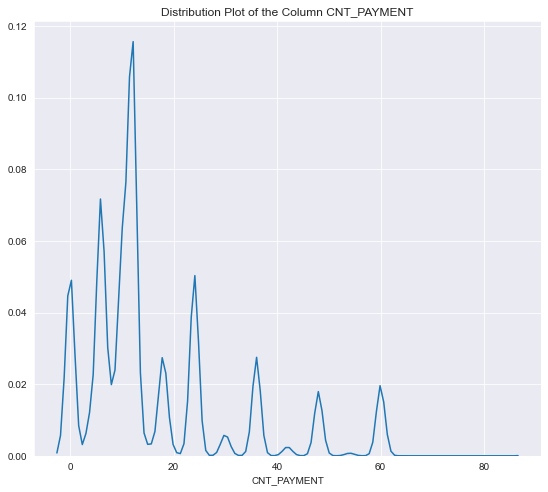

In [97]:
univ_prev_con('CNT_PAYMENT')

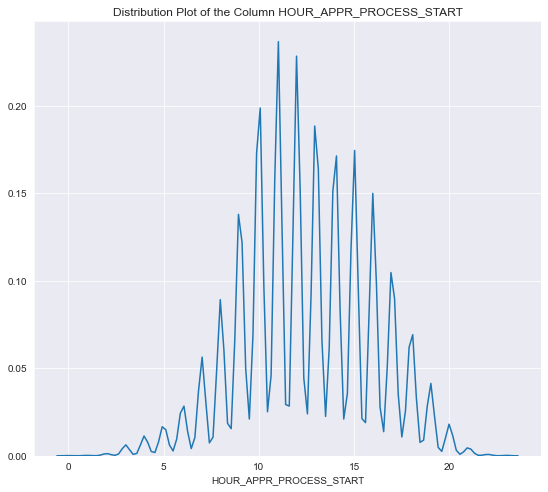

In [98]:
univ_prev_con('HOUR_APPR_PROCESS_START')

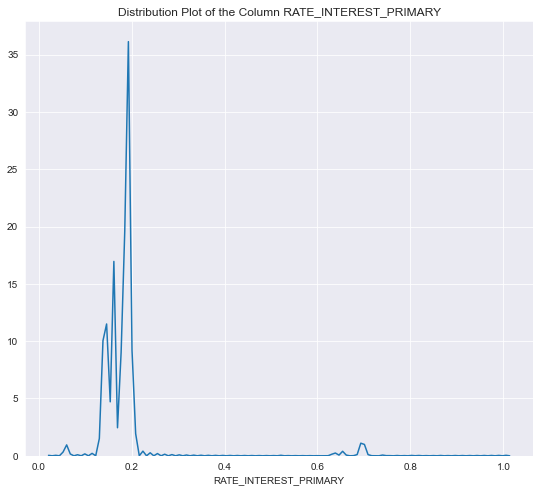

In [99]:
univ_prev_con('RATE_INTEREST_PRIMARY')

<div class="alert alert-block alert-info">
    <span style='font-family:Georgia'>
        <b>Inferences: </b> <br> Univariate Continuous Analysis:
      <ul>
     <li> Distribution plot of Application amount and amount credit for previous dataset is left skewed. </li>
     <li> Most number of payment counts lie betwenn 0-20 </li>
     <li> HOUR_APPR_PROCESS_START has peak values between 10-15  </li>
     <li> Rate interest primary has a right skeweness </li>
       </ul>
    </span>    
</div>

<h2 name='libraries'>   
      <font color = Red >
            <span style='font-family:Georgia'>
            7. Bivariate Analysis for Previous Data
            </span>   
        </font>    
</h2  

<h3>   
      <font color = purple >
            <span style='font-family:Georgia'>
             7.1 Continous v/s Continous 
            </span>   
        </font>    
</h3>

In [100]:
def biv_prev_con_con(col1, col2): 
    plt.figure(figsize= [10,8])
    ax= plt.scatter(data= df_previous, x= col1, y= col2)
    plt.title('Scatter plot distributions of two columns '+col1+ ' & '+col2)
    plt.xlabel(col1)
    plt.ylabel(col2)
    plt.show()

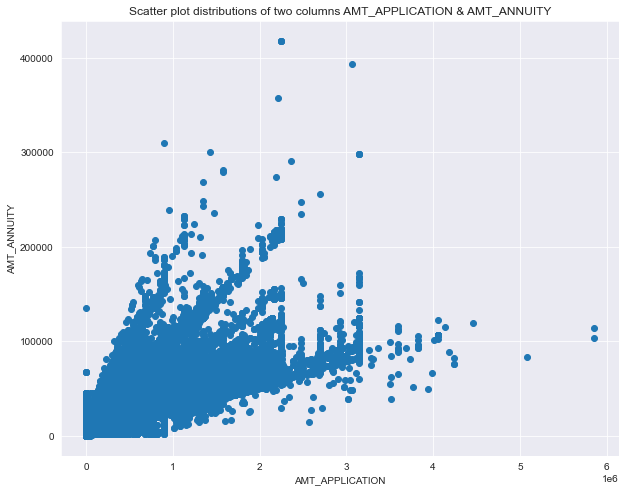

In [101]:
biv_prev_con_con('AMT_APPLICATION','AMT_ANNUITY')

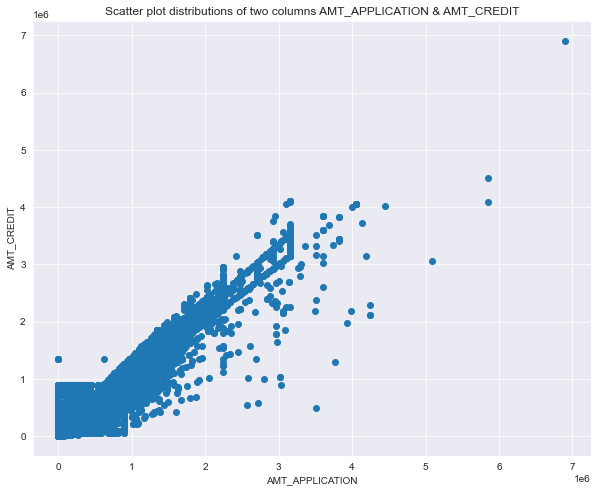

In [102]:
biv_prev_con_con('AMT_APPLICATION','AMT_CREDIT')

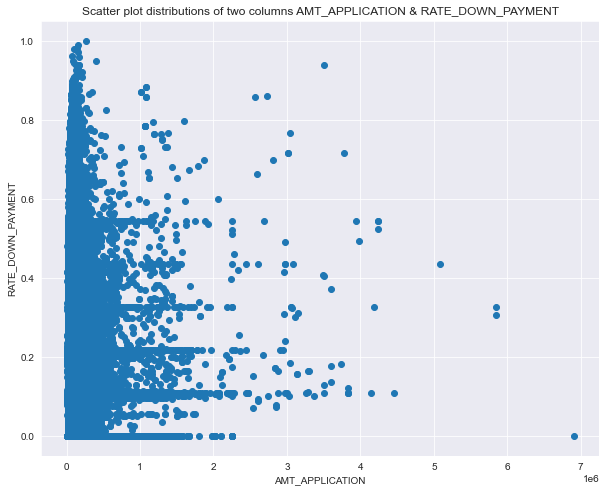

In [103]:
biv_prev_con_con('AMT_APPLICATION','RATE_DOWN_PAYMENT')

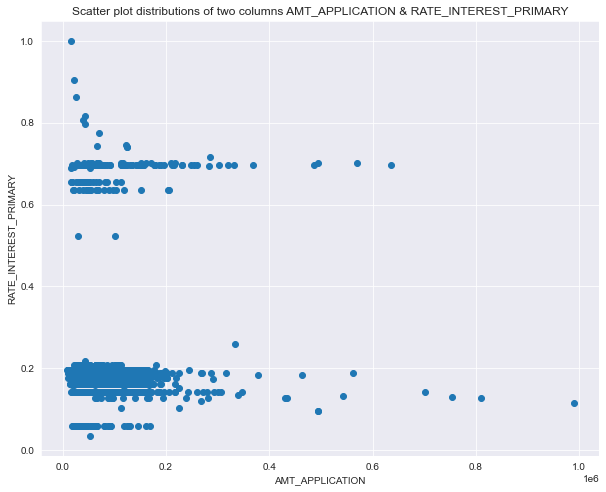

In [104]:
biv_prev_con_con('AMT_APPLICATION','RATE_INTEREST_PRIMARY')

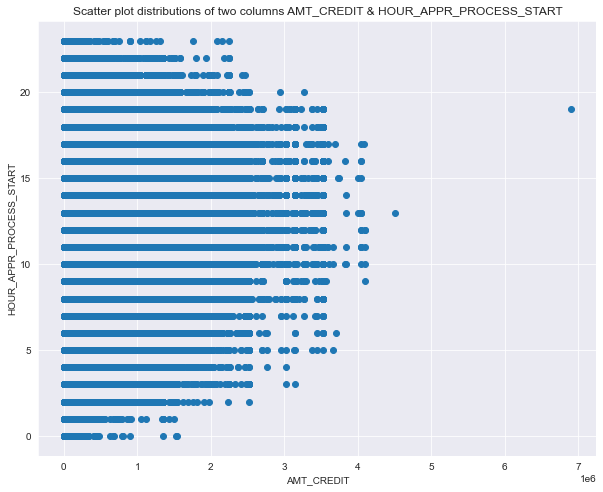

In [105]:
biv_prev_con_con('AMT_CREDIT','HOUR_APPR_PROCESS_START')

<div class="alert alert-block alert-info">
    <span style='font-family:Georgia'>
        <b>Inferences: </b> <br> Bivariate Continuous vs Continuous Analysis:
      <ul>
     <li> Amount application and amount annuity has a positive correlation </li>
     <li> Amount application and amount credit follow positive correlation with certain number of outliers. </li>
     <li> Amount application and rate down cluster has scatter plot clustured towards y axis. It contains certain number of outliers too. </li>
     <li> For amount application upto 2Lac, primary interest rate between 0-0.2 and 0.6-1 </li>
     <li> Amount credit and hour of application process start does not follow linear relationship </li>
       </ul>
    </span>    
</div>

<h3>   
      <font color = purple >
            <span style='font-family:Georgia'>
              7.2 Continous v/s Category 
            </span>   
        </font>    
</h3>

In [106]:
# defining a function for the bivariate continous v/s categorical analysis

def biv_prev_con_cat(col1, col2): 
    
    plt.figure(figsize= [10,8])
    sns.boxplot(data= df_previous[df_previous[col2]<df_previous[col2].quantile(0.995)], x= col1, y= col2)
    plt.title('Box plot distributions of two columns '+col1+ ' & '+col2)
    plt.show()

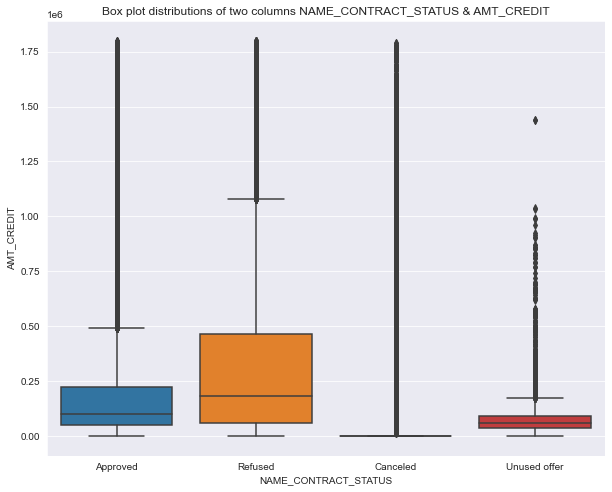

In [107]:
biv_prev_con_cat('NAME_CONTRACT_STATUS','AMT_CREDIT')

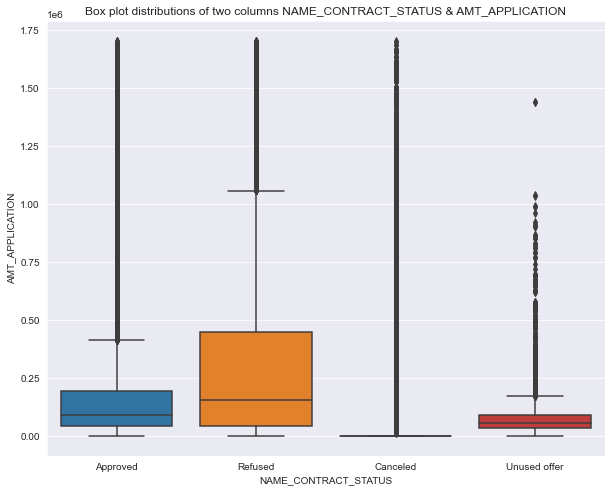

In [108]:
biv_prev_con_cat('NAME_CONTRACT_STATUS','AMT_APPLICATION')

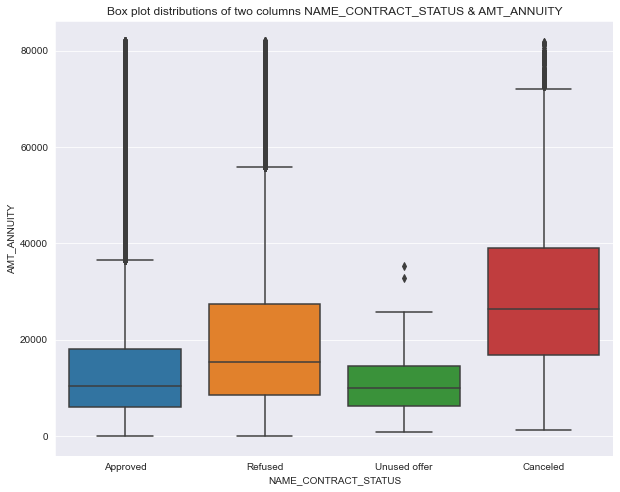

In [109]:
biv_prev_con_cat('NAME_CONTRACT_STATUS','AMT_ANNUITY')

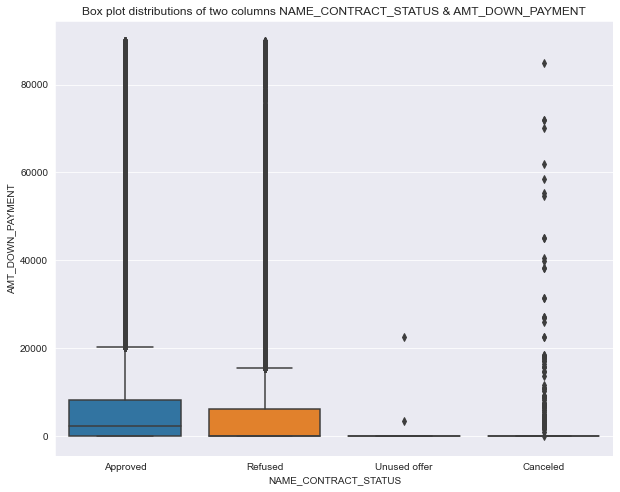

In [110]:
biv_prev_con_cat('NAME_CONTRACT_STATUS','AMT_DOWN_PAYMENT')

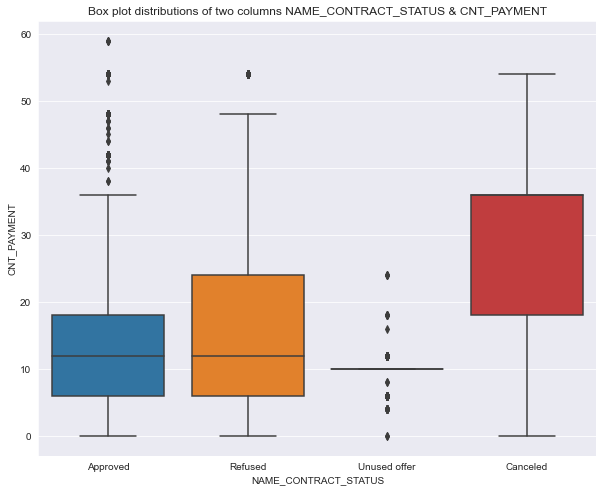

In [111]:
biv_prev_con_cat('NAME_CONTRACT_STATUS','CNT_PAYMENT')

<div class="alert alert-block alert-info">
    <span style='font-family:Georgia'>
        <b>Inferences: </b> <br> Bivariate Continuous vs Category Analysis:
      <ul>
     <li> Approved credit amount is less compared to refused credit amount. </li>
     <li> Amount of application for refused loans is more than the approved loans. </li>    
     <li> Amount annuity for approved loans is less than 40k while that of cancelled loans is above 60k. </li>
     <li> Down payment amount for approved loans is more than 20k while for refused loans is less than 20k. </li>
     <li> Payment count for Cancelled loans does not have any outliers. </li>
       </ul>
    </span>    
</div>

<h3>   
      <font color = purple >
            <span style='font-family:Georgia'>
              7.3 Category v/s Category 
            </span>   
        </font>    
</h3>

In [112]:
# defining a function for the bivariate continous v/s categorical analysis

def biv_prev_cat_cat(col1, col2): 
        
    plt.figure(figsize= [20,8])
    sns.countplot(data= df_previous, x= col1, hue= col2)
    plt.title('Count Plot distributions of two columns '+col1+' & '+col2)
    plt.show()

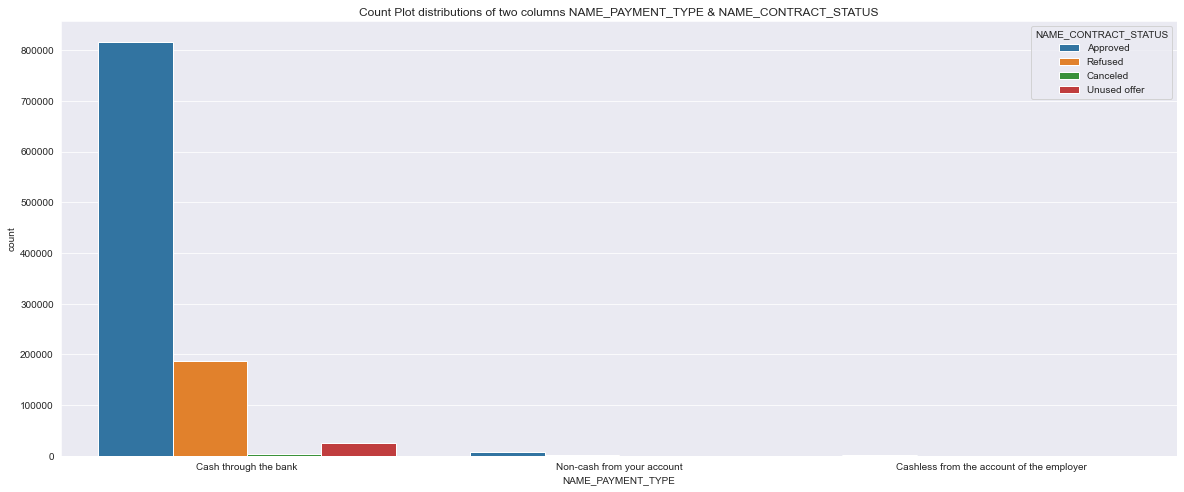

In [113]:
biv_prev_cat_cat('NAME_PAYMENT_TYPE','NAME_CONTRACT_STATUS')

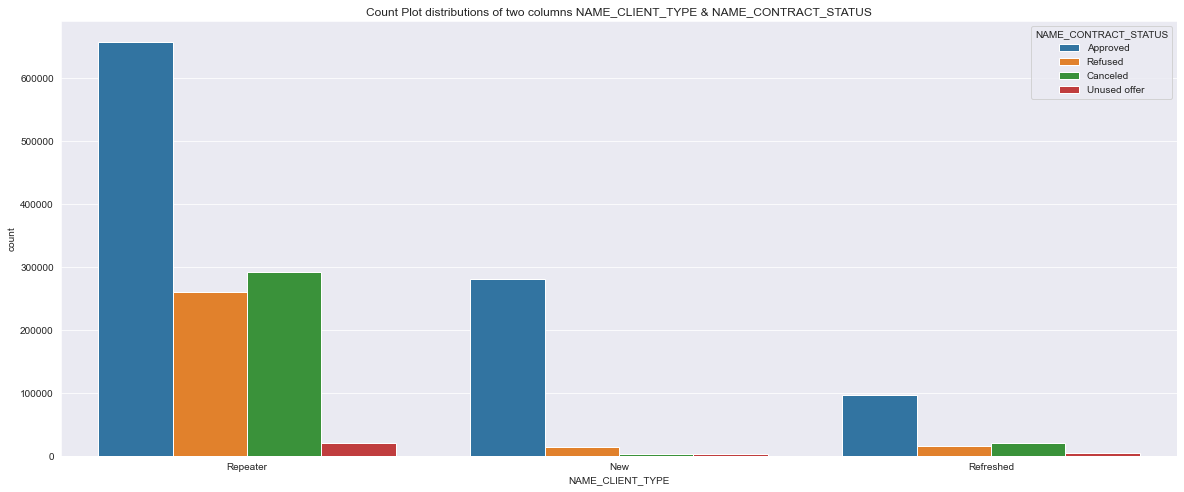

In [114]:
biv_prev_cat_cat('NAME_CLIENT_TYPE','NAME_CONTRACT_STATUS')

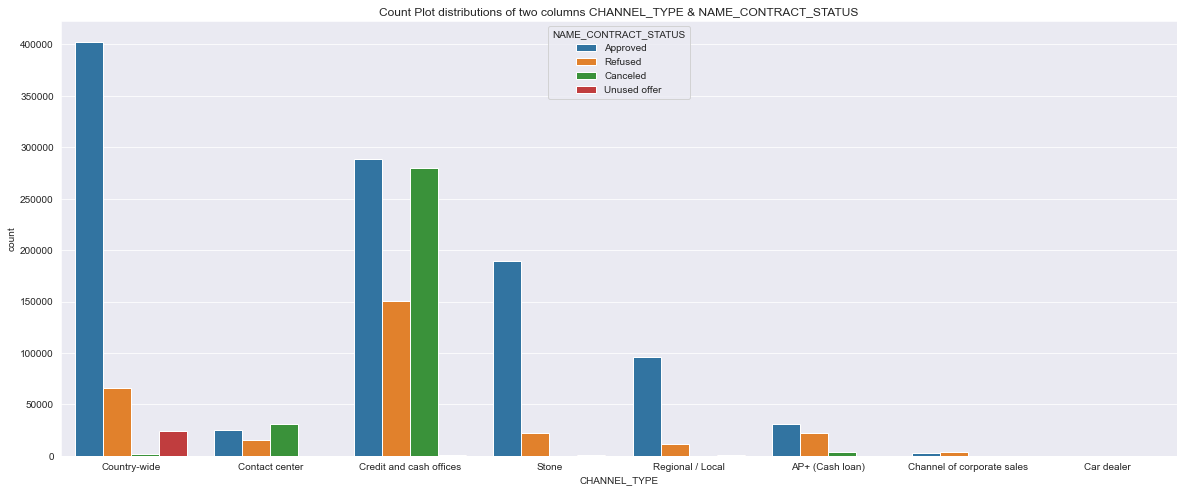

In [115]:
biv_prev_cat_cat('CHANNEL_TYPE','NAME_CONTRACT_STATUS')

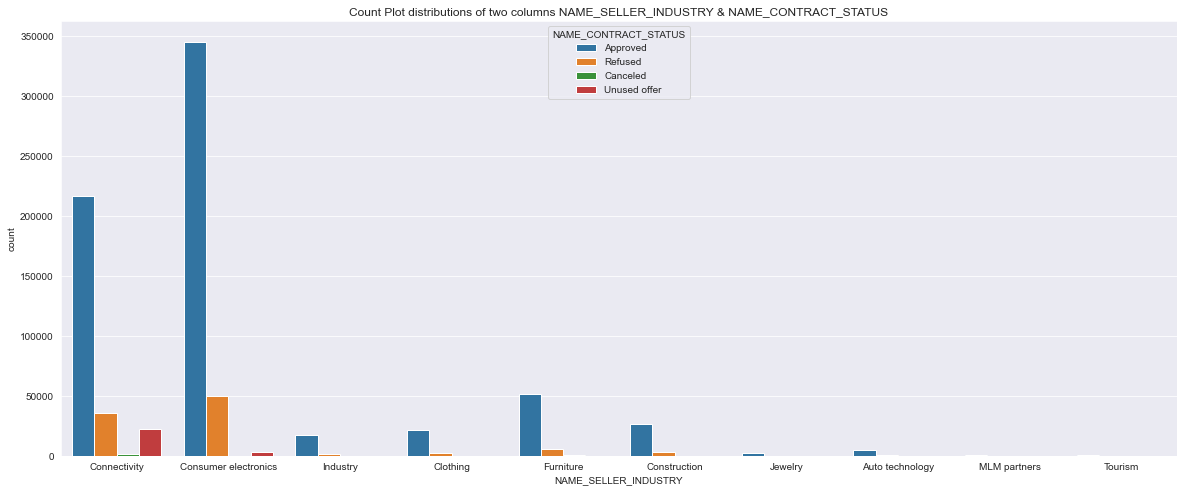

In [116]:
biv_prev_cat_cat('NAME_SELLER_INDUSTRY','NAME_CONTRACT_STATUS')

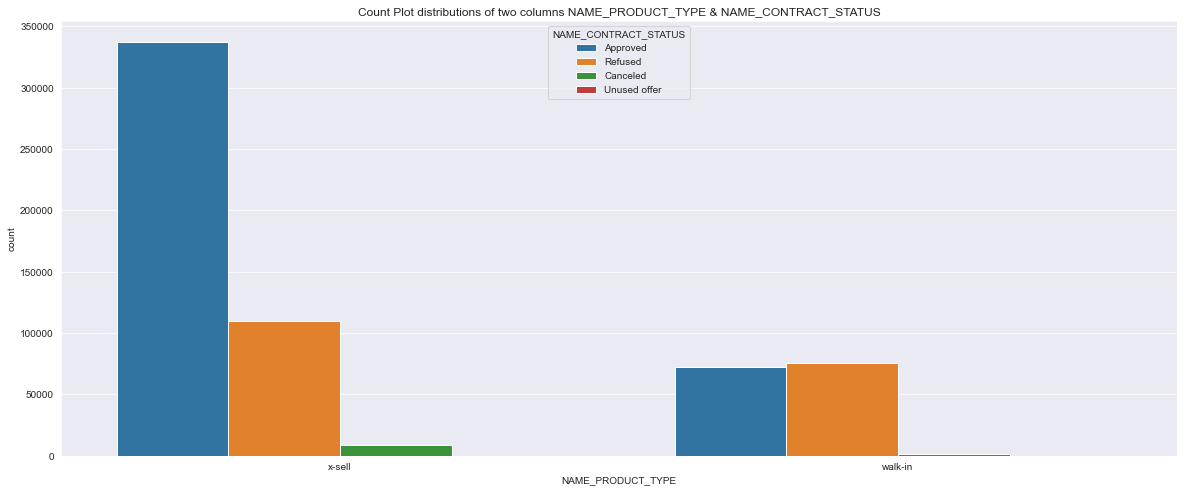

In [117]:
biv_prev_cat_cat('NAME_PRODUCT_TYPE','NAME_CONTRACT_STATUS')

<div class="alert alert-block alert-info">
    <span style='font-family:Georgia'>
        <b>Inferences: </b> <br> Bivariate Category vs Category Analysis:
      <ul>
     <li> Maximum number of approved loans are through cash from the bank. </li>
     <li> More number of cancelled loans come from repeaters. </li>    
     <li> Highest number of cancelled loans are from Credit and cash offices channel type. </li>
     <li> Least number of approved loans come from jewelry and Tourism seller industries</li>
     <li> For eaither x-sell or walk-in product type, there are zero unused offers. </li>
       </ul>
    </span>    
</div>

<h2 name='libraries'>   
      <font color = Red >
            <span style='font-family:Georgia'>
            8. Conclusion
            </span>   
        </font>    
</h2 


Based on the Analysis done on case study, certain conclusions that can be drawn based on Client with payment difficulties and clients with paid payments(Target variable) are listed below.

<div class="alert alert-block alert-success">
    <span style='font-family:Georgia'>
        <b>Correlation of target variable to decide whether an applicant will be Repayer: </b> 
        <ol>
            <li>NAME_EDUCATION_TYPE: Academic degree has less defaults. </li>
            <li>NAME_INCOME_TYPE: Student and Businessmen have no defaults.</li>
            <li>DAYS_BIRTH: People above age of 50 have low probability of defaulting</li>
            <li>CREDIT_RANGE :People who have credit amount less than 1Lac are less likely to be the defaulters.
            <li>NAME_EDUCATION_TYPE: People with Lower Secondary and Secondary education are less likely to default.</li>
        </ol>
    </span>    
</div>

<div class="alert alert-block alert-danger">
    <span style='font-family:Georgia'>
        <b>Correlation of target variable to decide whether an applicant will be a Defaulter: </b> 
        <ol>
            <li>CODE_GENDER: female are at relatively higher default rate</li>
            <li>NAME_CASH_LOAN_PURPOSE: Loan taken for the purpose of Repairs seems to have highest default rate.</li>
            <li>NAME_INCOME_TYPE: People who are on Maternity leave or unemployed have high chances of being the defaulters.</li>
            <li>DAYS_BIRTH: working People between age group 30-40 are more likely to be the defaulters.</li>
            <li>CREDIT_RANGE: People who have credit amount between 1-5 Lac are more likely to own a reality.</li>
        </ol>
    </span>    
</div>

<div class="alert alert-block alert-info">
    <span style='font-family:Georgia'>
        <b>Conclusions based on Previous dataset: </b> 
        <ol>
            <li>Highest number of cancelled loans are from Credit and cash offices channel type.</li>
            <li>More number of cancelled loans come from repeaters.</li>
            <li>Amount annuity for approved loans is less than 40k while that of cancelled loans is above 60k.</li>
            <li>Most of the loan applications were processed for Mobile and Customer EI goods type.</li>
            <li>For amount application upto 2Lac, primary interest rate between 0-0.2 and 0.6-1</li>
        </ol>
    </span>    
</div>